
# Invetigating European Soccer Data (2008-2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The Dataset we have here is collecting data for a set of countries and their leagues, it also contains data for the teams in these leagues and their players.
>
> Mainly, the dataset have 7 tables called 'Country', 'League', 'Match', 'Player', 'Player Attributes', 'Team' and 'Team Attributes'.
>
>The dataset contains data for seasons from 2008-2009  to 2015-2016 for different leagues and their teams contributing in the league and the players,
it also express data about the attributes of the teams and the players.
>
>The investigation aim to explore The dataset trying to find correlations between the varied data.
>
>The investigation will start with some questions and queries trying to find answers for them.

### Questions to be answered:

>Q1: How were the portions of the played matches for the different Leagues and different Seasons?
>
>Q2: which league is the most exciting  league? 
(according to victories and scored goals)
>
>Q3: which Season is the most exciting  one? 
(according to victories and scored goals)
>
>Q4: Which SEASON for Which LEAGUE was the best?
>
>Q5: What team attributes lead to the most victories?
>
>Q6: How the Switzerland Super League in Season 2009-2010?

        who win the most?

        who lost the fewest?

        who Draw the most?

        who Scored the most?

        who received the least goals?

        who was the champion?
>
>Q7:How FC Basel has been improved through the seasons?
>
>Q8:Who is the BEST Player?
>
>Q9:What attributes make you the best Player?


In [983]:
import pandas as pd
import numpy as np 
import seaborn as sb
import time 
import matplotlib.pyplot  as plt
%matplotlib inline 


Importing the needed packages.

<a id='wrangling'></a>
## Data Wrangling

In this section we are going to collect, sort, and check our dataset, checking for misallignmets or any needed modifications.


</a> we aim to get an overview on our data.
### General Properties

In [984]:
df_country = pd.read_csv('country.csv')
df_league = pd.read_csv('league.csv')
df_match = pd.read_csv('match.csv')
df_player = pd.read_csv('player.csv')
df_pattr = pd.read_csv('Player_attributes.csv')
df_tattr = pd.read_csv('Team_attributes.csv')
df_team = pd.read_csv('team.csv')

Importing the files of the dataset.

df_country: table of countries.

df_league: table of leagues.

df_match: table of matches.

df_player: table of players.

df_pattr: table of players' attributes.

df_tattr: table of teams' attributes.



**an overview on "match" file:**

In [985]:
df_match.head()  #getting an overview for the match table

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [986]:
df_match.shape  #check the table's shape


(25979, 115)

In [987]:
df_match.info()   #check the type of data in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [988]:
df_match.duplicated().sum()  #checking for any duplicated rows

0

In [989]:
df_match.isnull().sum()   #checking for any missing data

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [990]:
df_match.isnull().sum().sum()   #Count the rows of missing data

407395

In [991]:
df_match.describe()    #get a quick description for the data in the table

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


**an overview on "players" file:**

In [992]:
df_player.head()   #getting an overview for the Players' table

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [993]:
df_player.shape    #check the table's shape

(11060, 7)

In [994]:
df_player.info()    #check the type of data in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [995]:
df_player.isnull().sum()    #checking for any missing data

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [996]:
df_player.duplicated().sum()   #checking for any duplicated rows

0

In [997]:
df_player.describe()    #get a quick description for the data in the table

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


**an overview on "teams" file:**

In [998]:
df_team.head()    #getting an overview for the Teams' table

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [999]:
df_team.info()   #check the type of data in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [1000]:
df_team.shape       #check the table's shape

(299, 5)

In [1001]:
df_team.isnull().sum()    #checking for any missing data

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [1002]:
df_team.duplicated().sum()    #checking for any duplicated rows

0

**an overview on the "countries"  file:**

In [1003]:
df_country.head()    #getting an overview for the Countries' table

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [1004]:
df_country.info()  #check the type of data in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [1005]:
df_country.shape   #check the table's shape

(11, 2)

In [1006]:
df_country.isnull().sum()     #checking for any missing data

id      0
name    0
dtype: int64

In [1007]:
df_country.duplicated().sum()     #checking for any duplicated rows

0

**an overview on "leagues" file:**

In [1008]:
df_league.head()    #getting an overview for the Leagues' table

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [1009]:
df_league.info()   #check the type of data in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [1010]:
df_league.shape    #check the table's shape


(11, 3)

In [1011]:
df_league.duplicated().sum()     #checking for any duplicated rows

0

In [1012]:
df_league.isnull().sum()     #checking for any missing data

id            0
country_id    0
name          0
dtype: int64

**an overview on "team_attributes" file:**

In [1013]:
df_tattr.head()     #getting an overview for the Team_Attributes' table

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [1014]:
df_tattr.info()    #check the type of data in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [1015]:
df_tattr.shape    #check the table's shape

(1458, 25)

In [1016]:
df_tattr.duplicated().sum()     #checking for any duplicated rows

0

In [1017]:
df_tattr.isnull().sum()     #checking for any missing data

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [1018]:
df_tattr.isnull().sum().sum()      #counting Rows of missing data

969

In [1019]:
df_tattr.describe()      #get a quick description for data in the table

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


**an overview on "players_attributes" file:**

In [1020]:
df_pattr.head()     #getting an overview for the Players_Attributes' table

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [1021]:
df_pattr.info()   #check the type of data in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [1022]:
df_pattr.shape    #check the table's shape

(183978, 42)

In [1023]:
df_pattr.duplicated().sum()     #checking for any duplicated rows

0

In [1024]:
df_pattr.isnull().sum()      #checking for any missing data

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [1025]:
df_pattr.isnull().sum().sum()      #Counting Rows of missing data

47301

In [1026]:
df_pattr.describe()    #get a quick description for the data in the table

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000




## Data Cleaning

In this section we are going to mdoify columns, rename ones, dropping ones, and maybe also adding others. we will also adjust the type of data if needed. 
 
We are going to get the dataset well prepared for our investigation.

**Match file cleaning:**

In [1027]:
df_match=df_match.drop(df_match.columns[11:],axis=1)

Dropping Columns that wouldn't be helpfull in the investigation

In [1028]:
df_match = pd.merge(df_match, df_country, left_on='country_id', right_on='id', how='left')

Merging data from countries_file to match_file

In [1029]:
df_match = pd.merge(df_match, df_league, left_on='country_id', right_on='id', how='left')

Merging data from league_file to match_file

In [1030]:
df_match.head()

,id_x,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,name_x,id,country_id_y,name_y
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium,1,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,Belgium,1,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,1,Belgium,1,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1,Belgium,1,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,1,Belgium,1,1,Belgium Jupiler League


In [1031]:
df_match= df_match.rename(columns={'name_x': "country_name", 'name_y': "league_name"})


rename columns

In [1032]:
df_match= df_match.drop(columns=["id_y","id","country_id_y", "id_x","country_id_x","country_id_y","league_id"])

dropping columns ("id_y","id","country_id_y","id_x","country_id_x","country_id_y","league_id"), as we don't need them 

In [1033]:
df_match.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,league_name
0,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


check our last modifications

In [1034]:
df_match = pd.merge(df_match, df_team, left_on='home_team_api_id', right_on='team_api_id', how='left')
df_match.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,league_name,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,3,10000,15005.0,SV Zulte-Waregem,ZUL
2,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,5,9984,1750.0,KSV Cercle Brugge,CEB
3,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,7,9991,674.0,KAA Gent,GEN
4,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,9,7947,NaN,FCV Dender EH,DEN


merge data from team_file to match_file, to get home team data

In [1035]:
df_match= df_match.rename(columns={'team_long_name': "h_team", 'team_short_name': "h_team_sh"})
df_match.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,league_name,id,team_api_id,team_fifa_api_id,h_team,h_team_sh
0,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,3,10000,15005.0,SV Zulte-Waregem,ZUL
2,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,5,9984,1750.0,KSV Cercle Brugge,CEB
3,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,7,9991,674.0,KAA Gent,GEN
4,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,9,7947,NaN,FCV Dender EH,DEN


h_team: home team name 

h_team_sh: home team short name 

In [1036]:
df_match= df_match.drop(columns=["home_team_api_id","id","team_api_id", "team_fifa_api_id"])
df_match.head()

,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,league_name,h_team,h_team_sh
0,2008/2009,1,2008-08-17 00:00:00,492473,9993,1,1,Belgium,Belgium Jupiler League,KRC Genk,GEN
1,2008/2009,1,2008-08-16 00:00:00,492474,9994,0,0,Belgium,Belgium Jupiler League,SV Zulte-Waregem,ZUL
2,2008/2009,1,2008-08-16 00:00:00,492475,8635,0,3,Belgium,Belgium Jupiler League,KSV Cercle Brugge,CEB
3,2008/2009,1,2008-08-17 00:00:00,492476,9998,5,0,Belgium,Belgium Jupiler League,KAA Gent,GEN
4,2008/2009,1,2008-08-16 00:00:00,492477,9985,1,3,Belgium,Belgium Jupiler League,FCV Dender EH,DEN


drop columns("home_team_api_id","id","team_api_id", "team_fifa_api_id") as we don't need them

In [1037]:
df_match = pd.merge(df_match, df_team, left_on='away_team_api_id', right_on='team_api_id', how='left')
df_match.head()

,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,league_name,h_team,h_team_sh,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,2008/2009,1,2008-08-17 00:00:00,492473,9993,1,1,Belgium,Belgium Jupiler League,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
1,2008/2009,1,2008-08-16 00:00:00,492474,9994,0,0,Belgium,Belgium Jupiler League,SV Zulte-Waregem,ZUL,4,9994,2007.0,Sporting Lokeren,LOK
2,2008/2009,1,2008-08-16 00:00:00,492475,8635,0,3,Belgium,Belgium Jupiler League,KSV Cercle Brugge,CEB,6,8635,229.0,RSC Anderlecht,AND
3,2008/2009,1,2008-08-17 00:00:00,492476,9998,5,0,Belgium,Belgium Jupiler League,KAA Gent,GEN,8,9998,1747.0,RAEC Mons,MON
4,2008/2009,1,2008-08-16 00:00:00,492477,9985,1,3,Belgium,Belgium Jupiler League,FCV Dender EH,DEN,10,9985,232.0,Standard de Liège,STL


merge data from team_files to match_files, to get away team data

In [1038]:
df_match= df_match.rename(columns={'team_long_name': "a_team", 'team_short_name': "a_team_sh"})
df_match.head()

,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,league_name,h_team,h_team_sh,id,team_api_id,team_fifa_api_id,a_team,a_team_sh
0,2008/2009,1,2008-08-17 00:00:00,492473,9993,1,1,Belgium,Belgium Jupiler League,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
1,2008/2009,1,2008-08-16 00:00:00,492474,9994,0,0,Belgium,Belgium Jupiler League,SV Zulte-Waregem,ZUL,4,9994,2007.0,Sporting Lokeren,LOK
2,2008/2009,1,2008-08-16 00:00:00,492475,8635,0,3,Belgium,Belgium Jupiler League,KSV Cercle Brugge,CEB,6,8635,229.0,RSC Anderlecht,AND
3,2008/2009,1,2008-08-17 00:00:00,492476,9998,5,0,Belgium,Belgium Jupiler League,KAA Gent,GEN,8,9998,1747.0,RAEC Mons,MON
4,2008/2009,1,2008-08-16 00:00:00,492477,9985,1,3,Belgium,Belgium Jupiler League,FCV Dender EH,DEN,10,9985,232.0,Standard de Liège,STL


a_team: away team name 
    
a_team_sh: away team short name     

In [1039]:
df_match= df_match.drop(columns=["away_team_api_id","id","team_api_id", "team_fifa_api_id"])
df_match.head()

,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,h_team,h_team_sh,a_team,a_team_sh
0,2008/2009,1,2008-08-17 00:00:00,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,GEN,Beerschot AC,BAC
1,2008/2009,1,2008-08-16 00:00:00,492474,0,0,Belgium,Belgium Jupiler League,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK
2,2008/2009,1,2008-08-16 00:00:00,492475,0,3,Belgium,Belgium Jupiler League,KSV Cercle Brugge,CEB,RSC Anderlecht,AND
3,2008/2009,1,2008-08-17 00:00:00,492476,5,0,Belgium,Belgium Jupiler League,KAA Gent,GEN,RAEC Mons,MON
4,2008/2009,1,2008-08-16 00:00:00,492477,1,3,Belgium,Belgium Jupiler League,FCV Dender EH,DEN,Standard de Liège,STL


dropping columns ("away_team_api_id","id","team_api_id", "team_fifa_api_id") as we don't need them any longer

In [1040]:
df_match['date'] = pd.to_datetime(df_match['date'])

adjust type of column "date"

In [1041]:

def win(df_match):
    
    home_score = df_match[0] 
    away_score = df_match[1] 
    home_team_name = df_match[2] 
    away_team_name = df_match[3] 
    
    if home_score > away_score:
        return home_team_name
    elif home_score < away_score:
        return away_team_name
    else:
        return 'DRAW'
    
df_match['winner']  = df_match[['home_team_goal', 'away_team_goal', 'h_team', 'a_team']].apply(win, axis=1)

inserting new column for the winner team

In [1042]:

def lose(df_match):
    
    home_score = df_match[0] 
    away_score = df_match[1] 
    home_team_name = df_match[2] 
    away_team_name = df_match[3] 
    
    if home_score < away_score:
        return home_team_name
    elif home_score > away_score:
        return away_team_name
    else:
        return 'DRAW'
    
df_match['loser']  = df_match[['home_team_goal', 'away_team_goal', 'h_team', 'a_team']].apply(lose, axis=1)

inserting new column for the loser team

In [1043]:
df_match["diff"]=df_match.home_team_goal -df_match.away_team_goal


adding a new column for goals difference between home tea and away team.

In [1044]:
df_match.shape

(25979, 15)

In [1045]:
df_match.isnull().sum()

season            0
stage             0
date              0
match_api_id      0
home_team_goal    0
away_team_goal    0
country_name      0
league_name       0
h_team            0
h_team_sh         0
a_team            0
a_team_sh         0
winner            0
loser             0
diff              0
dtype: int64

In [1046]:
df_match.duplicated().sum()

0

In [1047]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   season          25979 non-null  object        
 1   stage           25979 non-null  int64         
 2   date            25979 non-null  datetime64[ns]
 3   match_api_id    25979 non-null  int64         
 4   home_team_goal  25979 non-null  int64         
 5   away_team_goal  25979 non-null  int64         
 6   country_name    25979 non-null  object        
 7   league_name     25979 non-null  object        
 8   h_team          25979 non-null  object        
 9   h_team_sh       25979 non-null  object        
 10  a_team          25979 non-null  object        
 11  a_team_sh       25979 non-null  object        
 12  winner          25979 non-null  object        
 13  loser           25979 non-null  object        
 14  diff            25979 non-null  int64         
dtypes:

In [1048]:
df_match.head()

,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,h_team,h_team_sh,a_team,a_team_sh,winner,loser,diff
0,2008/2009,1,2008-08-17,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,GEN,Beerschot AC,BAC,DRAW,DRAW,0
1,2008/2009,1,2008-08-16,492474,0,0,Belgium,Belgium Jupiler League,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,DRAW,DRAW,0
2,2008/2009,1,2008-08-16,492475,0,3,Belgium,Belgium Jupiler League,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,RSC Anderlecht,KSV Cercle Brugge,-3
3,2008/2009,1,2008-08-17,492476,5,0,Belgium,Belgium Jupiler League,KAA Gent,GEN,RAEC Mons,MON,KAA Gent,RAEC Mons,5
4,2008/2009,1,2008-08-16,492477,1,3,Belgium,Belgium Jupiler League,FCV Dender EH,DEN,Standard de Liège,STL,Standard de Liège,FCV Dender EH,-2


overview and final check for the new shape of the table, missing values, and duplicated data.

### Country file cleaning:

In [1049]:
df_country = df_country.rename(columns={'name': "country_name","id":"country_id"})
df_country.head()

,country_id,country_name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


rename columns to be more specific

### Players file cleaning:

In [1050]:
df_player['birthday'] =pd.to_datetime(df_player['birthday'])

change the type of the "birthday" column

In [1051]:
df_player["weight"]=df_player["weight"].astype("float") 

change the type of the "weight" column

In [1052]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 605.0+ KB


check the last modifications

### Players' attributes file cleaning:

In [1053]:
df_pattr.shape

(183978, 42)

In [1054]:
df_pattr.isnull().sum().sum()

47301

check the missing data

In [1055]:
df_pattr=df_pattr.dropna()

remove rows with missing data

In [1056]:
df_pattr.shape

(180354, 42)

check the last modification

In [1057]:
df_pattr.head(0)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes


In [1058]:
df_player.head(0)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight


In [1059]:
df_pattr=pd.merge(df_pattr, df_player, left_on='player_api_id', right_on='player_api_id', how='left')
df_pattr.head()

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29,182.88,187.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29,182.88,187.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29,182.88,187.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29,182.88,187.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29,182.88,187.0


merge data from player_file to player_attributes_file 

In [1060]:
df_pattr= df_pattr.drop(columns=["id_y","player_fifa_api_id_y"])
df_pattr.head(0)

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight


drop columns ("id_y","player_fifa_api_id_y"), which we don't need any longer

In [1061]:
df_pattr= df_pattr.rename(columns={"id_x":"id", "player_fifa_api_id_x":"player_fifa_api_id"})
df_pattr.head(0)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight


rename columns

### Teams' attributes file cleaning

In [1062]:
df_tattr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [1063]:
df_pattr.date=pd.to_datetime(df_pattr.date).dt.date.astype('datetime64[ns]')

change the type of data in column "date"

In [1064]:
df_tattr.shape

(1458, 25)

In [1065]:
df_tattr=df_tattr.drop(["buildUpPlayDribbling"], axis=1)
df_tattr.shape

(1458, 24)

drop the column "buildUpPlayDribbling" as it contains all the missing data and it can misslead the investigation.

In [1066]:
df_tattr=pd.merge(df_tattr, df_team, left_on='team_api_id', right_on='team_api_id', how='left')
df_tattr.head()

,id_x,team_fifa_api_id_x,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id_y,team_fifa_api_id_y,team_long_name,team_short_name
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,Little,50,Mixed,Organised,...,Medium,55,Press,45,Normal,Cover,49119,434.0,FC Aarau,AAR
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,Normal,56,Mixed,Organised,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,Normal,54,Mixed,Organised,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
3,4,77,8485,2010-02-22 00:00:00,70,Fast,Little,70,Long,Organised,...,Medium,70,Double,70,Wide,Cover,39393,77.0,Aberdeen,ABE
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,Little,52,Mixed,Organised,...,Medium,47,Press,52,Normal,Cover,39393,77.0,Aberdeen,ABE


merge data from the team_file to the team_attribute_file

In [1067]:
df_tattr= df_tattr.drop(columns=["id_y","team_fifa_api_id_y"])
df_tattr.head(0)


,id_x,team_fifa_api_id_x,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name


drop columns ("id_y", "team_fifa_api_id_y") as we don't need them.

In [1068]:
df_tattr= df_tattr.rename(columns={"id_x":"id", "team_fifa_api_id_x":"team_fifa_api_id"})
df_tattr.head(0)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name


rename columns for more specific clear names.

<a id='eda'></a>
## Exploratory Data Analysis

>In this section we are going to start the exploration trip in our data, exploring the relationships between variables, exploring for answers for the proposed questions and queries.

### Q1: How were the portions of the played matches for the different Leagues and different Seasons?

In [1069]:
match_1516 = df_match[df_match['season'] == '2015/2016'] 
match_1415 = df_match[df_match['season'] == '2014/2015'] 
match_1314 = df_match[df_match['season'] == '2013/2014'] 
match_1213 = df_match[df_match['season'] == '2012/2013'] 
match_1112 = df_match[df_match['season'] == '2011/2012'] 
match_1011 = df_match[df_match['season'] == '2010/2011'] 
match_0910 = df_match[df_match['season'] == '2009/2010'] 
match_0809 = df_match[df_match['season'] == '2008/2009'] 

league_match_1516=match_1516.groupby('league_name')['a_team'].count().sort_values()
league_match_1415=match_1415.groupby('league_name')['a_team'].count().sort_values()
league_match_1314=match_1314.groupby('league_name')['a_team'].count().sort_values()
league_match_1213=match_1213.groupby('league_name')['a_team'].count().sort_values()
league_match_1112=match_1112.groupby('league_name')['a_team'].count().sort_values()
league_match_1011=match_1011.groupby('league_name')['a_team'].count().sort_values()
league_match_0910=match_0910.groupby('league_name')['a_team'].count().sort_values()
league_match_0809=match_0809.groupby('league_name')['a_team'].count().sort_values()


match_1516: matches played in season 2015-2016

match_1415: matches played in season 2014-2015 

match_1314: matches played in season 2013-2014

match_1213: matches played in season 2012-2013

match_1112: matches played in season 2011-2012

match_1011: matches played in season 2010-2011

match_0910: matches played in season 2009-2010

match_0809: matches played in season 2008-2009s


league_match_1516: leagues' portions of matches played in season 2015-2016

league_match_1415: leagues' portions of matches played in season 2014-2015

league_match_1314: leagues' portions of matches played in season 2013-2014

league_match_1213: leagues' portions of matches played in season 2012-2013

league_match_1112: leagues' portions of matches played in season 2011-2012

league_match_1011: leagues' portions of matches played in season 2010-2011

league_match_0910: leagues' portions of matches played in season 2009-2010

league_match_0809: leagues' portions of matches played in season 2008-2009


In [1070]:
league_match = df_match.groupby('league_name')['a_team'].count().sort_values()
league_match  

#No. of matches played in each league through the whole period. 
# league_match: no. of matches played in league.

league_name
Switzerland Super League    1422
Belgium Jupiler League      1728
Scotland Premier League     1824
Poland Ekstraklasa          1920
Portugal Liga ZON Sagres    2052
Germany 1. Bundesliga       2448
Netherlands Eredivisie      2448
Italy Serie A               3017
England Premier League      3040
France Ligue 1              3040
Spain LIGA BBVA             3040
Name: a_team, dtype: int64

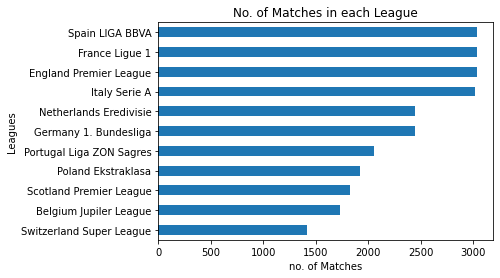

In [1071]:
league_match.plot(kind='barh', title='No. of Matches in each League');
plt.xlabel('no. of Matches');
plt.ylabel('Leagues');   
#bar chart showing leagues'portions of matches.

In [1072]:
season_league_match= df_match.groupby('season')['league_name'].value_counts()  
season_league_match

#season_league_match: no. of matches played in each season for each league.

#showing the leagues' portions of matches for each season.

season     league_name             
2008/2009  England Premier League      380
           France Ligue 1              380
           Italy Serie A               380
           Spain LIGA BBVA             380
           Belgium Jupiler League      306
                                      ... 
2015/2016  Portugal Liga ZON Sagres    306
           Belgium Jupiler League      240
           Poland Ekstraklasa          240
           Scotland Premier League     228
           Switzerland Super League    180
Name: league_name, Length: 88, dtype: int64

In [1073]:
def lol(league_match, season):
    league_match.plot(kind='barh', title='No. of Matches in each League for Season {}'.format(season));
    plt.xlabel('no. of Matches');
    plt.ylabel('Leagues');

ploting bar chart for each season showing their portions of matches played.

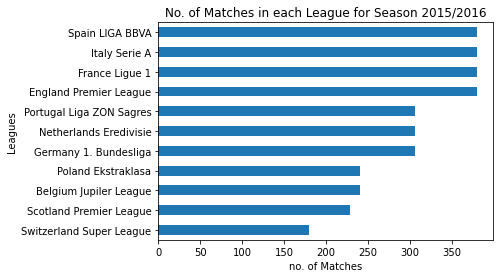

In [1074]:
lol(league_match_1516, "2015/2016")

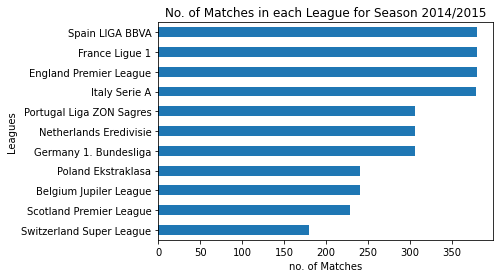

In [1075]:
lol(league_match_1415, "2014/2015")

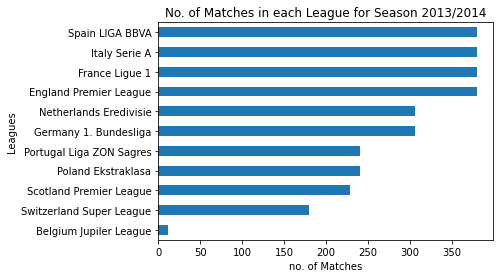

In [1076]:
lol(league_match_1314, "2013/2014")

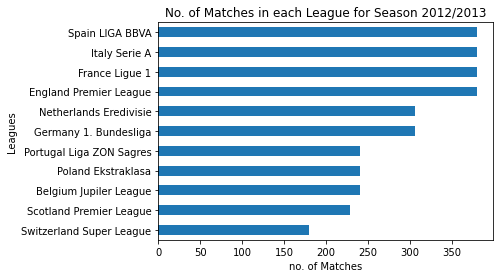

In [1077]:
lol(league_match_1213, "2012/2013")

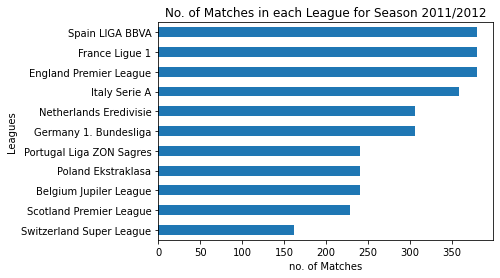

In [1078]:
lol(league_match_1112, "2011/2012")

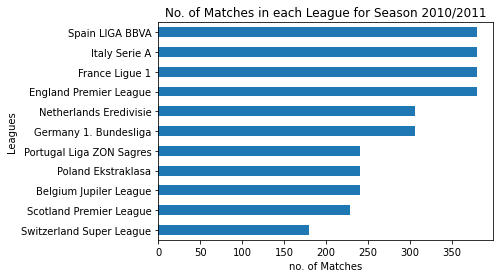

In [1079]:
lol(league_match_1011, "2010/2011")

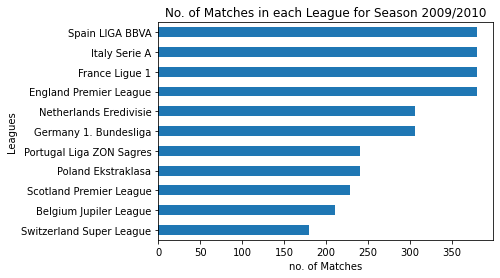

In [1080]:
lol(league_match_0910, "2009/2010")

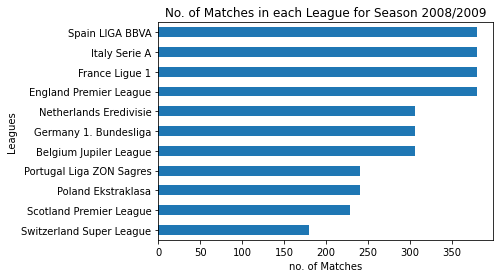

In [1081]:
lol(league_match_0809, "2008/2009")

In [1082]:
season_games=df_match.groupby('season')['league_name'].count().sort_values()
season_games  

#showing seasons' portions of the played matches.
#season_games: no. of matches played in each season.

season
2013/2014    3032
2011/2012    3220
2009/2010    3230
2010/2011    3260
2012/2013    3260
2014/2015    3325
2008/2009    3326
2015/2016    3326
Name: league_name, dtype: int64

as we can see season's portions wasn't the same.

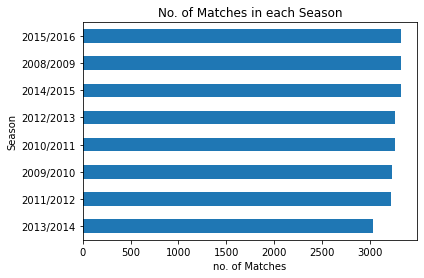

In [1083]:
season_games.plot(kind='barh', title='No. of Matches in each Season');
plt.xlabel('no. of Matches');
plt.ylabel('Season');

#plotting season's portions of matches

### Q2: which league is the most exciting  league?
#### (according to victories and scored goals)

**The Most exciting league according to victories:**

In [1084]:
victory_league=df_match.groupby(["league_name"]).apply(lambda x: (x.winner != 'DRAW').sum()).sort_values(ascending=True)
victory_league

# Victory_league: no. of victories in each league

league_name
Switzerland Super League    1076
Belgium Jupiler League      1303
Scotland Premier League     1377
Poland Ekstraklasa          1395
Portugal Liga ZON Sagres    1519
Germany 1. Bundesliga       1851
Netherlands Eredivisie      1867
France Ligue 1              2181
Italy Serie A               2221
England Premier League      2257
Spain LIGA BBVA             2336
dtype: int64

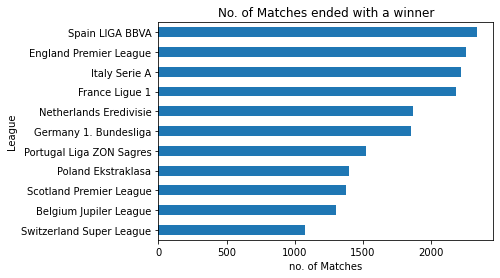

In [1085]:
victory_league.plot(kind='barh', title='No. of Matches ended with a winner');
plt.xlabel('no. of Matches');
plt.ylabel('League');

**Spain LIGA BBVA** is the league of the most victories along the 8 seasons (with 2336 victories),

**England Premier League** is coming second in the most exciting leagues list (with 2257 victories).

while **Switzerland Super League** comes last for the least victories (with 1076 victories).

**But** these results maybe misleading, because these leagues have different portions of the played matches.

**what would be changed if we used the rate of victories of the played matches??**

In [1086]:
victory_league_rate= victory_league/league_match
victories_league_rate=victory_league_rate.sort_values()
victories_league_rate

# victories_league_rate:  no. of vectories out of the whole no. of matches for each league.

league_name
France Ligue 1              0.717434
Poland Ekstraklasa          0.726562
Italy Serie A               0.736162
Portugal Liga ZON Sagres    0.740253
England Premier League      0.742434
Belgium Jupiler League      0.754051
Scotland Premier League     0.754934
Germany 1. Bundesliga       0.756127
Switzerland Super League    0.756681
Netherlands Eredivisie      0.762663
Spain LIGA BBVA             0.768421
dtype: float64

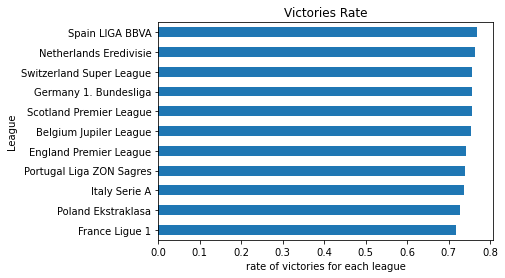

In [1087]:
victories_league_rate.plot(kind='barh', title='Victories Rate');
plt.xlabel('rate of victories for each league');
plt.ylabel('League');

We can notice that the victrories rates are all close in the different leagues, 

but:

**Spain LIGA BBVA** still on the top of the most exciting League (with a victories rate 0.768),

and **Netherlands Eredivise** is the second most exciting league (with a victories rate 0.762)

but as a surprise **Switzerland Super League** comes from the last to the third most exciting league (with a victories rate 0.757)






**The Most exciting league according to scored goals:**

In [1088]:
goals_league= df_match.groupby('league_name')['home_team_goal'].sum().sort_values(ascending = False) + df_match.groupby('league_name')['away_team_goal'].sum().sort_values(ascending = False)
goals_league.sort_values(ascending = True, inplace =True)
goals_league

# goals_league: no. of goals scored in each league.

league_name
Switzerland Super League    4166
Poland Ekstraklasa          4656
Scotland Premier League     4804
Belgium Jupiler League      4841
Portugal Liga ZON Sagres    5201
Germany 1. Bundesliga       7103
France Ligue 1              7427
Netherlands Eredivisie      7542
Italy Serie A               7895
England Premier League      8240
Spain LIGA BBVA             8412
dtype: int64

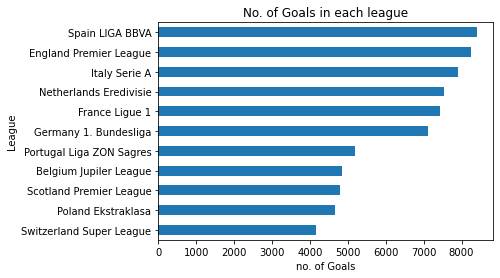

In [1089]:
goals_league.plot(kind='barh', title='No. of Goals in each league');
plt.xlabel('no. of Goals');
plt.ylabel('League');

**Spain LIGA BBVA** agin on the top of the most exciting Leagues (for 8412 scored goals)

**England Premier League** comes second of the most exciting leagues (for 8240 scored goals)

**Switzerland Super League** comes last as the most exciting leagues according to the scored goals (for 4166 scored goals)


**BUT** again we can't make depend only on the scored goals only, we should take a look on the scoring rate.

In [1090]:
league_goal_per_match=goals_league/league_match
league_goal_per_match.sort_values(ascending = True, inplace =True)
league_goal_per_match

# league_goal_per_match: rate of scorng per match in each league.

league_name
Poland Ekstraklasa          2.425000
France Ligue 1              2.443092
Portugal Liga ZON Sagres    2.534600
Italy Serie A               2.616838
Scotland Premier League     2.633772
England Premier League      2.710526
Spain LIGA BBVA             2.767105
Belgium Jupiler League      2.801505
Germany 1. Bundesliga       2.901552
Switzerland Super League    2.929677
Netherlands Eredivisie      3.080882
dtype: float64

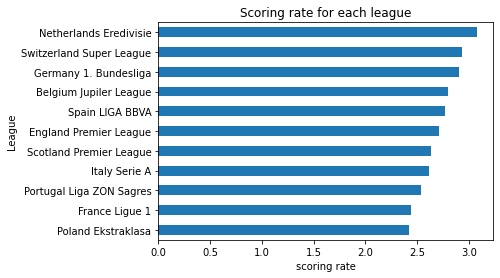

In [1091]:
league_goal_per_match.plot(kind='barh', title='Scoring rate for each league');
plt.xlabel('scoring rate');
plt.ylabel('League');

as a surprise Spain LIGA BBV not on the top this time,

while **Netherlands Eredivisie** has the highest scoring rate (3 goal per match)

the **Switzerland Super League** has the second highest scoring rate (2.93 goal per match)

while **Poland Ekstraklas** comes last with scoring rate (2.425 goal per match)

### On the other side which league has the most matches with Draw? 

In [1092]:
meh_league=df_match[['winner',"league_name"]].value_counts().loc["DRAW"]
meh_league

# meh_league: matches with draw in each league.

league_name
France Ligue 1              859
Italy Serie A               796
England Premier League      783
Spain LIGA BBVA             704
Germany 1. Bundesliga       597
Netherlands Eredivisie      581
Portugal Liga ZON Sagres    533
Poland Ekstraklasa          525
Scotland Premier League     447
Belgium Jupiler League      425
Switzerland Super League    346
dtype: int64

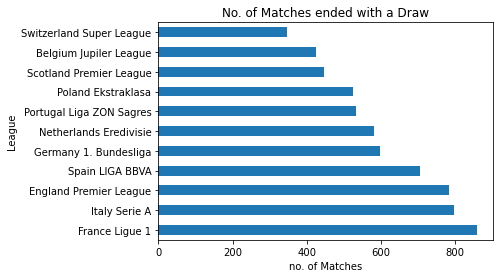

In [1093]:
meh_league.plot(kind='barh', title='No. of Matches ended with a Draw');
plt.xlabel('no. of Matches');
plt.ylabel('League');

Here we can see the no. of matches with draw across the different leagues:

**France ligeu 1**  has the highest number of matches with draw (859 matches)

**Italy Seria A** has the second highest number of matches with draw (796 matches)

**Switzerland Super League** has the least number of matches with draw (346 matches) 

**And** to avoid getting misleaded we will get the ratio of the matches with draw, as the following:

In [1094]:
draw_league_rate = meh/league_match
draw_league_rate = draw_rate.sort_values()
draw_league_rate

# draw_league_rate: no. of matches ended with draw out of the whole matches.

league_name
Spain LIGA BBVA             0.231579
Netherlands Eredivisie      0.237337
Switzerland Super League    0.243319
Germany 1. Bundesliga       0.243873
Scotland Premier League     0.245066
Belgium Jupiler League      0.245949
England Premier League      0.257566
Portugal Liga ZON Sagres    0.259747
Italy Serie A               0.263838
Poland Ekstraklasa          0.273438
France Ligue 1              0.282566
dtype: float64

**France Ligue 1** comes first (with 0.283)

**Poland Estraklasa** comes second (with 0.273)

**Spain LIga BBVA** comes last (with 0.232)


*these ratios aren't a surprise as they are the complement for the victories ratios.* 



#### SPAIN LIGA BBVA proves that it was the best league accoring to the victories ratio and the scoring ratio


### Q3: which season is the most exciting  one?
#### (according to victories and scored goals)



**The Most exciting Season according to Victories:**

In [1095]:
season_victory=df_match.groupby(["season"]).apply(lambda x: (x.winner != 'DRAW').sum()).sort_values(ascending=True)
season_victory

# season_victory: no. of victories in each season.

season
2013/2014    2296
2011/2012    2402
2012/2013    2407
2009/2010    2416
2010/2011    2421
2015/2016    2471
2014/2015    2475
2008/2009    2495
dtype: int64

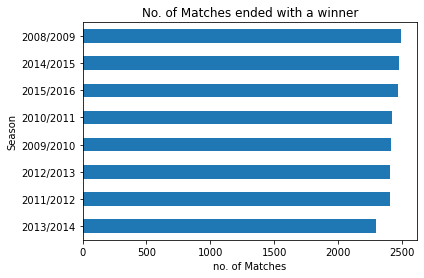

In [1096]:
season_victory.plot(kind='barh', title='No. of Matches ended with a winner');
plt.xlabel('no. of Matches');
plt.ylabel('Season');

we can notice according to the number of victories in each season that:

**Season 2008-2009** has the most victories (with 2495 victories)

**season 2014-2015** has the second most victories (with 2475 victories)

while **season 2013-2014** has the least victories (with 2296 victories)


**But** we know that we should take the number of the played matches in consideration. 



**let's see how would that impact the results:**

In [1097]:
season_victory_rate= season_victory/season_games
season_victories_rate= season_victory_rate.sort_values()
season_victories_rate

# season_victories_rate:  no. of vectories out of the whole no. of matches for each season.

season
2012/2013    0.738344
2010/2011    0.742638
2015/2016    0.742934
2014/2015    0.744361
2011/2012    0.745963
2009/2010    0.747988
2008/2009    0.750150
2013/2014    0.757256
dtype: float64

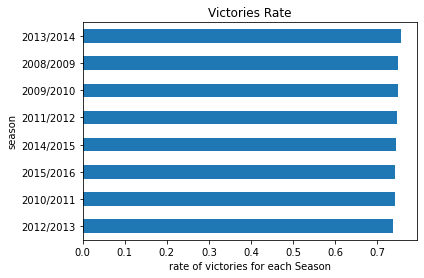

In [1098]:
season_victories_rate.plot(kind='barh', title='Victories Rate');
plt.xlabel('rate of victories for each Season');
plt.ylabel('season');

after taking the number of matches in consideration, we get that:

after being the last for number of victories, **Season 2013-2014** comes first for the victories rate (with 75.7%)

while **Season 2008-2009** comes second for the victories rate (with 75%)

and **Season 2012-2013** comes last for the victories rate (with 73.8%)



**The Most exciting Season according to the scored goals:**

In [1099]:
season_goals= df_match.groupby('season')['home_team_goal'].sum().sort_values(ascending = False) + df_match.groupby('season')['away_team_goal'].sum().sort_values(ascending = False)
season_goals.sort_values(ascending = True, inplace =True)
season_goals

# season_goals: no. of goals scored in each season.

season
2013/2014    8389
2009/2010    8632
2008/2009    8672
2011/2012    8747
2010/2011    8749
2014/2015    8897
2012/2013    9039
2015/2016    9162
dtype: int64

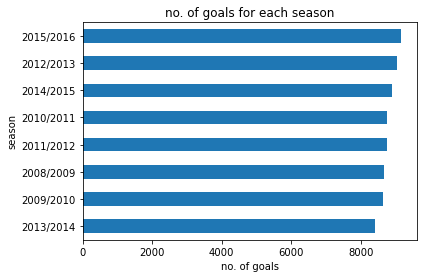

In [1100]:
season_goals.plot(kind='barh', title='no. of goals for each season');
plt.xlabel('no. of goals');
plt.ylabel('season');


**season 2015-2016**  comes first with the most scored goals. (with 9162 goals)

**season 2012-2013** somes second with the no. of the scored goals. (with 9039 goals)

**season 2013-2014** comes last with the no. of the scored goals. (with 8389 goals) 



>
>

**let's see how would that change if we calculate the rate of goals per matches:**



In [1101]:
season_goal_per_match=season_goals/season_games
season_goal_per_match.sort_values(ascending = True, inplace =True)
season_goal_per_match

# season_goal_per_match: rate of scorng per match in each Season.

season
2008/2009    2.607336
2009/2010    2.672446
2014/2015    2.675789
2010/2011    2.683742
2011/2012    2.716460
2015/2016    2.754660
2013/2014    2.766821
2012/2013    2.772699
dtype: float64

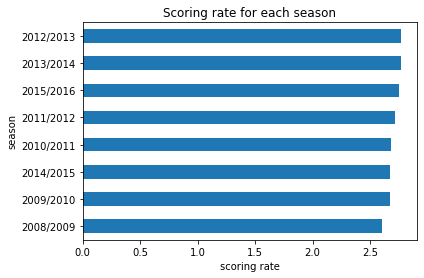

In [1102]:
season_goal_per_match.plot(kind='barh', title='Scoring rate for each season');
plt.xlabel('scoring rate');
plt.ylabel('season');

we can notice that the scoring rates are almost equal, but it's found that:

**Season 2012-2013** has the highest scoring rate. (with 2.77 goal/match)

**Season 2013-2014** has the second highest scoring rate. (with 2.76 goal/match)


**Season 2008-2009** was the season of the least scoring rate. (with 2.61 goal/match)


#### So SEASON 2013-2014 has the highest victories  rate with 75.7%, and also it has the second heighest scoring rate with 2.76 goals/match

#### Season 2012-2013 has the highest scoring rate with 2.77 goals/match, but it was the last for the victories rate with 73.8%.





#### so SEASON 2013-2014 was the most exciting season.
*(according to the victories rate and the scoring rate*)

### Q4: Which SEASON for Which LEAGUE was the best?

In [1103]:
season_league_match= df_match.groupby('season')['league_name'].value_counts()  
season_league_match

#season_league_match: no. of matches played in each season for each league.

season     league_name             
2008/2009  England Premier League      380
           France Ligue 1              380
           Italy Serie A               380
           Spain LIGA BBVA             380
           Belgium Jupiler League      306
                                      ... 
2015/2016  Portugal Liga ZON Sagres    306
           Belgium Jupiler League      240
           Poland Ekstraklasa          240
           Scotland Premier League     228
           Switzerland Super League    180
Name: league_name, Length: 88, dtype: int64

showing the number of matches in each season for each league.

In [1104]:
season_league_victory=df_match.groupby(["season", "league_name"]).apply(lambda x: (x.winner != 'DRAW').sum()).sort_values(ascending=False)
season_league_victory

# season_league_victory: no. of victories in each season for each league.

season     league_name             
2013/2014  England Premier League      302
2010/2011  Spain LIGA BBVA             301
2008/2009  Spain LIGA BBVA             297
2012/2013  Spain LIGA BBVA             296
2013/2014  Spain LIGA BBVA             294
                                      ... 
2015/2016  Switzerland Super League    133
2014/2015  Switzerland Super League    132
2010/2011  Switzerland Super League    129
2011/2012  Switzerland Super League    122
2013/2014  Belgium Jupiler League       10
Length: 88, dtype: int64

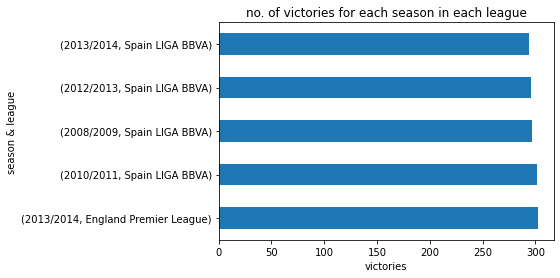

In [1105]:
season_league_victory.head().plot(kind='barh', title='no. of victories for each season in each league');
plt.xlabel('victories');
plt.ylabel('season & league');

**England Premier League** in season **2013-2014** has the highest number of victories.(302 victories)

**Spain LIGA BBVA** in season **2010-2011** has the second heighest number of victories. (301 victories)



**let's see the rate of victories:**

In [1106]:
season_league_victory_rate= season_league_victory / season_league_match
season_league_victory_rate.sort_values(ascending = False, inplace =True)
season_league_victory_rate


#season_league_victory_rate: rate of vectories for each season in each league.

season     league_name             
2009/2010  Switzerland Super League    0.838889
2013/2014  Belgium Jupiler League      0.833333
2014/2015  Scotland Premier League     0.807018
2009/2010  Netherlands Eredivisie      0.797386
2013/2014  England Premier League      0.794737
                                         ...   
           Poland Ekstraklasa          0.695833
2015/2016  Poland Ekstraklasa          0.691667
2014/2015  Italy Serie A               0.683377
2012/2013  Scotland Premier League     0.679825
2010/2011  France Ligue 1              0.657895
Length: 88, dtype: float64

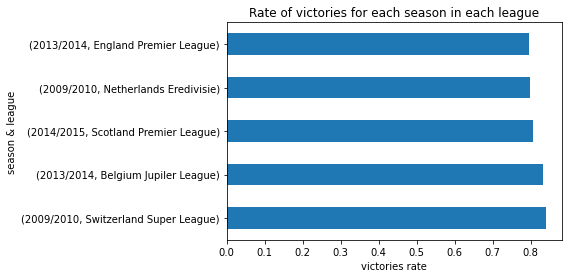

In [1107]:
season_league_victory_rate.head().plot(kind='barh', title='Rate of victories for each season in each league');
plt.xlabel('victories rate');
plt.ylabel('season & league');

**The Rate of Victories show that:**

**Switzerland Super League** has the heighest rate of victories in season **2009-2010**  with 83.9%

**Belgium Jupiler League** has the second heighest rate of victories in season **2013-2014**  with 83.3%




#### What about the Scored Goals?

In [1108]:
season_league_goals= df_match.groupby(['season', 'league_name'])['home_team_goal'].sum().sort_values(ascending = False) + df_match.groupby(['season', 'league_name'])['away_team_goal'].sum()
season_league_goals.sort_values(ascending = False, inplace =True)
season_league_goals

# season_league_goals: no. of goals scored in each league for each season.

season     league_name             
2008/2009  Spain LIGA BBVA             1101
2012/2013  Spain LIGA BBVA             1091
2011/2012  England Premier League      1066
2010/2011  England Premier League      1063
2012/2013  England Premier League      1063
                                       ... 
2013/2014  Switzerland Super League     520
2014/2015  Switzerland Super League     517
2012/2013  Switzerland Super League     462
2011/2012  Switzerland Super League     425
2013/2014  Belgium Jupiler League        30
Length: 88, dtype: int64

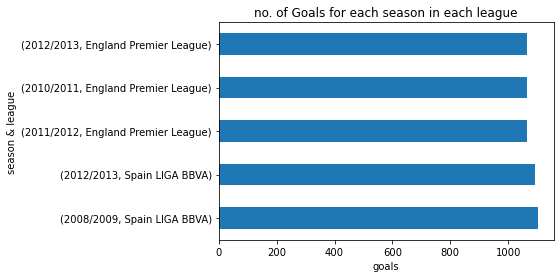

In [1109]:
season_league_goals.head().plot(kind='barh', title='no. of Goals for each season in each league');
plt.xlabel('goals');
plt.ylabel('season & league');

**Spain LIGA BBVA** has the most scored goals in season **2008-2009** with 1101 goals.

**Spain LIGA BBVA** has also the secon most scored goals but in season **2012-2013** with 1091 goals.



**let's see the scoring rate:**

In [1110]:
season_league_goals_rate= season_league_goals / season_league_match
season_league_goals_rate.sort_values(ascending = False, inplace =True)
season_league_goals_rate


#season_league_goals_rate: rate of scoring goals fore each season in each league.

season     league_name             
2009/2010  Switzerland Super League    3.327778
2011/2012  Netherlands Eredivisie      3.258170
2010/2011  Netherlands Eredivisie      3.225490
2013/2014  Netherlands Eredivisie      3.196078
           Germany 1. Bundesliga       3.160131
                                         ...   
2008/2009  Portugal Liga ZON Sagres    2.300000
           France Ligue 1              2.257895
2009/2010  Poland Ekstraklasa          2.216667
2011/2012  Poland Ekstraklasa          2.195833
2008/2009  Poland Ekstraklasa          2.183333
Length: 88, dtype: float64

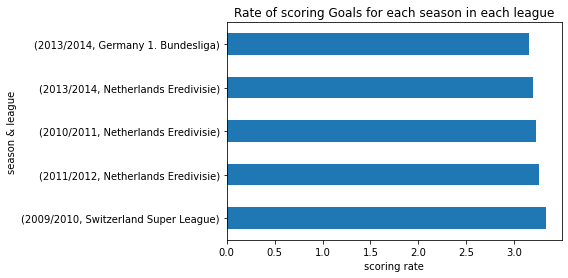

In [1111]:
season_league_goals_rate.head().plot(kind='barh', title='Rate of scoring Goals for each season in each league');
plt.xlabel('scoring rate');
plt.ylabel('season & league');

**The Rate of Scoring show that:**

**Switzerland Super League** has the heighest rate of Scoring in season **2009-2010**  with 3.33 goals/match

**Netherlands Eredivisie** has the second heighest rate of victories in season **2011-2012**  with 3.26 goals/match




we can notice that:

The season **2009-2010** for **Switzerland Super League**  is the most exciting.

it has the most victories rate, and it also has the highest scoring rate.

*Let's take a deeper look in that remarkable season in* **Switzerland Super League** *in that remarkable season* **2009-2010**

### Q5: What team attributes lead to the most victories?

Firstly, we get the teams of the most victories, 
We will pick the top 5 teams of the most victories in Switzerland Super League in that remarkable season 2009-2010

In [1112]:
winnerz = df_match[df_match["league_name"]=="Switzerland Super League"].winner.value_counts().head(6).iloc[1:]
top=winnerz.index
winnerz


#winnerz: the top 5 teas of the most victories in Switzerland Super League in that remarkable season 2009-2010.
#top: the long names of the winnerz.

FC Basel                   180
BSC Young Boys             142
FC Zürich                  120
Grasshopper Club Zürich    115
FC Luzern                  105
Name: winner, dtype: int64

it's found that 'FC Basel', 'BSC Young Boys', 'FC Zürich', 'Grasshopper Club Zürich',
        and 'FC Luzern' are the top 5 teams for the most victories.

In [1113]:
df_tattr["overall_rate"]=(df_tattr.buildUpPlaySpeed + df_tattr.buildUpPlayPassing + df_tattr.chanceCreationPassing + df_tattr.chanceCreationCrossing + df_tattr.chanceCreationShooting + df_tattr.defencePressure + df_tattr.defenceAggression + df_tattr.defenceTeamWidth)/8

#overall_rate: the mean of the all attributes for each team.

In [1114]:
top_teams = df_tattr[(df_tattr["team_long_name"].isin(top)) & (df_tattr['date'] >='2009-01-01 00:00:00') & (df_tattr['date'] <='2011-01-01 00:00:00')]

#top_teams: the data of the winnerz in the season 2009-2010.

In [1115]:
x_attributes = ['team_long_name', "overall_rate", 'buildUpPlaySpeed', 'buildUpPlayPassing','chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting','defencePressure', 'defenceAggression', 'defenceTeamWidth']

top_teams[x_attributes]


#x_attributes: the numerical attributes of the teams and the overall rating.

,team_long_name,overall_rate,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
130,FC Basel,53.750,40,45,50,65,50,60,60,60
445,FC Zürich,53.125,45,60,45,70,50,50,55,50
529,Grasshopper Club Zürich,52.500,30,50,55,70,55,40,60,60
770,FC Luzern,51.875,45,60,45,70,60,40,45,50
1433,BSC Young Boys,58.125,55,55,55,70,60,55,55,60


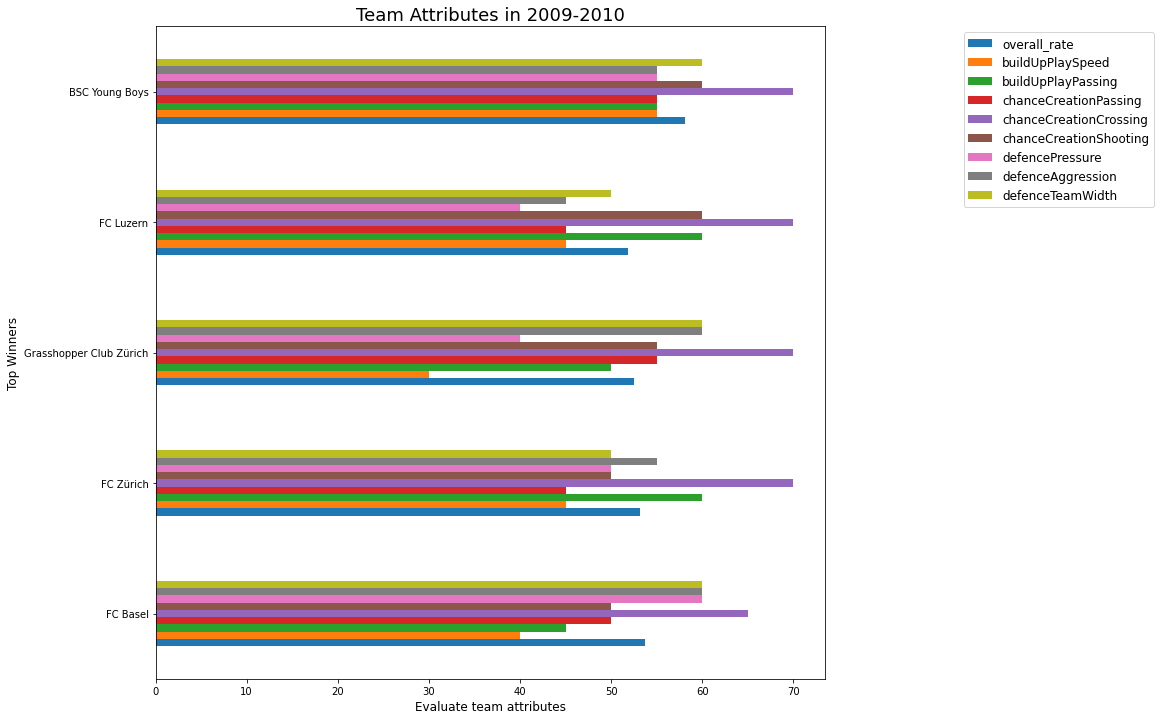

In [1120]:
fig, ax = plt.subplots(figsize=(12, 12) )

ax = top_teams[x_attributes].plot.barh(ax=ax);

ax.set_yticklabels(top_teams['team_long_name'], fontsize=10)

ax.set_ylabel('Top Winners', fontsize=12)

ax.set_title('Team Attributes in 2009-2010', fontsize=18)

plt.legend(bbox_to_anchor =(1, 0, 0.5, 1), fontsize=12)

plt.xlabel("Evaluate team attributes", fontsize=12);




 by showing and plotting the numerical atrributes for teams, it's found that:
 
 > All of the Top winners have high "ChanceCreationCrossing" not less than 65.
 >
 > Top Winners usually have "DefenceAgression" over 50.
 >
 > Top Winners have "DefenceTeamWidth" over 50.
 >
 > Top Winners have "ChanceCreationShooting" over 50 and sometimes exceeds 60.
 >
 > Top Winners usually have "BuildUpPlayPassing" over 50.
 >
 > Top Winners usually have "BuildUpPlaySeed" under 50.
 > 
 > Top winners usually have "DefencePressure" between 40 and 60.
 >
 > Top winners usually have "ChanceCreatingPassing" between 45 and 55.

*let's look Deeper and ask more about the Switzerland Super League in Season 2009-2010*

### Q6: How the Switzerland Super League in Season 2009-2010??
#### who win the most?
#### who lost the fewest?
#### who Draw the most?
#### who Scored the most?
#### who received the least goals?
#### who was the champion?








#### 6.1. Who win the most?


In [1121]:
match_swis_0910= match_0910[match_0910["league_name"]=="Switzerland Super League"]
match_swis_0910

#match_swis_0910: matches played in Switzerland Super League season 2009-2010

,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,h_team,h_team_sh,a_team,a_team_sh,winner,loser,diff
24737,2009/2010,1,2009-07-11,663669,1,0,Switzerland,Switzerland Super League,FC Aarau,AAR,Grasshopper Club Zürich,GRA,FC Aarau,Grasshopper Club Zürich,1
24738,2009/2010,1,2009-07-12,663670,1,1,Switzerland,Switzerland Super League,AC Bellinzona,BEL,Neuchâtel Xamax,XAM,DRAW,DRAW,0
24739,2009/2010,1,2009-07-12,663671,2,0,Switzerland,Switzerland Super League,FC St. Gallen,GAL,FC Basel,BAS,FC St. Gallen,FC Basel,2
24740,2009/2010,1,2009-07-14,663672,2,3,Switzerland,Switzerland Super League,FC Zürich,ZUR,BSC Young Boys,YB,BSC Young Boys,FC Zürich,-1
24741,2009/2010,1,2009-07-22,663678,3,1,Switzerland,Switzerland Super League,FC Sion,SIO,FC Luzern,LUZ,FC Sion,FC Luzern,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24912,2009/2010,9,2009-09-12,663709,1,1,Switzerland,Switzerland Super League,FC St. Gallen,GAL,FC Sion,SIO,DRAW,DRAW,0
24913,2009/2010,9,2009-09-12,663710,4,3,Switzerland,Switzerland Super League,FC Zürich,ZUR,Grasshopper Club Zürich,GRA,FC Zürich,Grasshopper Club Zürich,1
24914,2009/2010,9,2009-09-13,663711,2,4,Switzerland,Switzerland Super League,FC Aarau,AAR,FC Luzern,LUZ,FC Luzern,FC Aarau,-2
24915,2009/2010,9,2009-09-13,663712,2,3,Switzerland,Switzerland Super League,AC Bellinzona,BEL,FC Basel,BAS,FC Basel,AC Bellinzona,-1


In [1122]:
winners_swis_0910=match_swis_0910.winner.value_counts().iloc[1:]
winners_swis_0910

#winners_swis_0910: no. of victories for each team in Switzerland Super League season 2009-2010

BSC Young Boys             25
FC Basel                   25
Grasshopper Club Zürich    21
FC Luzern                  17
FC Sion                    14
FC St. Gallen              13
FC Zürich                  12
Neuchâtel Xamax            11
AC Bellinzona               7
FC Aarau                    6
Name: winner, dtype: int64

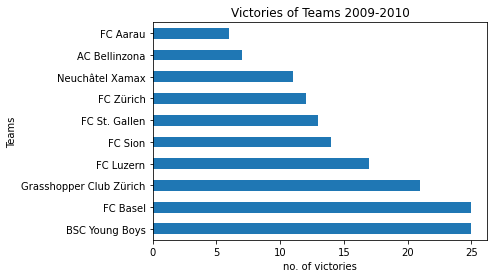

In [1123]:
winners_swis_0910.plot(kind='barh', title='Victories of Teams 2009-2010');
plt.xlabel('no. of victories');
plt.ylabel('Teams');

**FC Basel** and **BSC Young Boys** won the most among the teams, they both have **25 victories** in the season.

on the other side **FC Aarau** has the least number of victories with **6 victories**

In [1124]:
h_winners_swis_0910= match_swis_0910.groupby(["h_team"]).apply(lambda x: (x["diff"] > 0).sum()).sort_values(ascending=False)
h_winners_swis_0910

#h_winners_swis_0910: no. of victories for each team in Switzerland Super League as a home team season 2009-2010

h_team
BSC Young Boys             15
FC Basel                   14
Grasshopper Club Zürich    14
FC Luzern                  12
FC Sion                    11
FC Zürich                   9
Neuchâtel Xamax             8
FC St. Gallen               7
AC Bellinzona               5
FC Aarau                    4
dtype: int64

In [1125]:
a_winners_swis_0910= match_swis_0910.groupby(["a_team"]).apply(lambda x: (x["diff"] < 0).sum()).sort_values(ascending=False)
a_winners_swis_0910

#a_winners_swis_0910: no. of victories for each team in Switzerland Super League as an away team season 2009-2010

a_team
FC Basel                   11
BSC Young Boys             10
Grasshopper Club Zürich     7
FC St. Gallen               6
FC Luzern                   5
FC Sion                     3
FC Zürich                   3
Neuchâtel Xamax             3
AC Bellinzona               2
FC Aarau                    2
dtype: int64

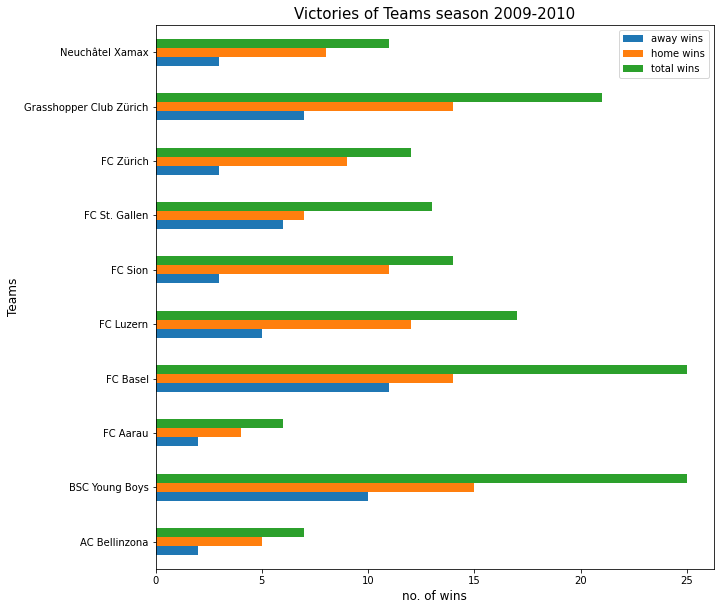

In [1126]:
df = pd.DataFrame({'away wins': a_winners_swis_0910,
                   'home wins': h_winners_swis_0910, "total wins":winners_swis_0910})
ax = df.plot.barh(figsize=(10,10), fontsize=10)
plt.xlabel("no. of wins", fontsize=12);
plt.ylabel("Teams", fontsize=12);
plt.title("Victories of Teams season 2009-2010", fontsize=15);

Here we can notice the victories of each team, and we can also see the portions of the **home wins** and the **away wins**.

**6.2. Who lost the fewest?**

In [1127]:
losers_swis_0910=match_swis_0910.loser.value_counts().iloc[1:]
losers_swis_0910=losers_swis_0910.sort_values(ascending=True)
losers_swis_0910

#losers_swis_0910: no. of defeats for each team in Switzerland Super League season 2009-2010

FC Basel                    6
BSC Young Boys              9
FC Luzern                  12
Grasshopper Club Zürich    13
FC Sion                    13
FC Zürich                  15
FC St. Gallen              16
Neuchâtel Xamax            17
FC Aarau                   25
AC Bellinzona              25
Name: loser, dtype: int64

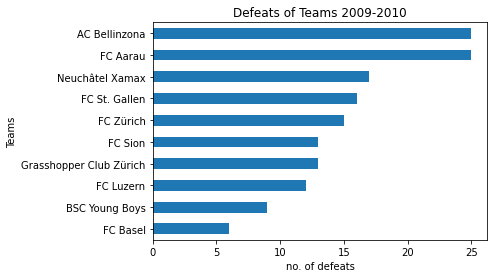

In [1128]:
losers_swis_0910.plot(kind='barh', title='Defeats of Teams 2009-2010');
plt.xlabel('no. of defeats');
plt.ylabel('Teams');

**FC Basel** has the fewest no. of defeats (with **6 defeats**) 

**BSC Young Boys** has the second fewest no. of defeats (with **9 defeats**)

on the other side **FC Aarau** & **AC Bellinzona** have both the most defeats (with **25 defeats**)


In [1129]:
h_losers_swis_0910= match_swis_0910.groupby(["h_team"]).apply(lambda x: (x["diff"] < 0).sum()).sort_values(ascending=False)
h_losers_swis_0910

#h_losers_swis_0910: no. of defeats for each team in Switzerland Super League as a home team season 2009-2010

h_team
FC Aarau                   12
AC Bellinzona              10
FC St. Gallen               6
Neuchâtel Xamax             6
FC Luzern                   5
FC Zürich                   5
Grasshopper Club Zürich     3
FC Basel                    2
FC Sion                     2
BSC Young Boys              1
dtype: int64

In [1130]:
a_losers_swis_0910= match_swis_0910.groupby(["a_team"]).apply(lambda x: (x["diff"] > 0).sum()).sort_values(ascending=False)
a_losers_swis_0910

#a_losers_swis_0910: no. of defeats for each team in Switzerland Super League as an away team season 2009-2010

a_team
AC Bellinzona              15
FC Aarau                   13
FC Sion                    11
Neuchâtel Xamax            11
FC St. Gallen              10
FC Zürich                  10
Grasshopper Club Zürich    10
BSC Young Boys              8
FC Luzern                   7
FC Basel                    4
dtype: int64

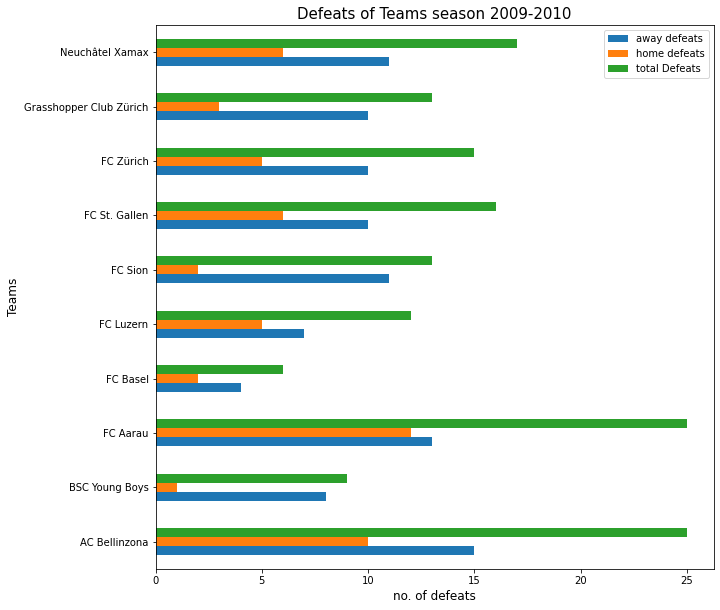

In [1131]:
df = pd.DataFrame({'away defeats': a_losers_swis_0910,
                   'home defeats': h_losers_swis_0910, "total Defeats":losers_swis_0910})
ax = df.plot.barh(figsize=(10,10), fontsize=10)
plt.xlabel("no. of defeats", fontsize=12);
plt.ylabel("Teams", fontsize=12);
plt.title("Defeats of Teams season 2009-2010", fontsize=15);

Here we can notice the Defeats of each team, and we can also see the portions of the **home defeats** and the **away defeats**.

**6.3. Who Draw the most?**

In [1132]:
draws_swis_0910= 2*match_swis_0910.a_team.value_counts() - winners_swis_0910 -losers_swis_0910 
draws_swis_0910.sort_values(ascending=True, inplace= True)
draws_swis_0910

#draws_swis_0910: no. of matches ended with draw for each team in Switzerland Super League season 2009-2010

BSC Young Boys             2
Grasshopper Club Zürich    2
AC Bellinzona              4
FC Aarau                   5
FC Basel                   5
FC Luzern                  7
FC St. Gallen              7
Neuchâtel Xamax            8
FC Sion                    9
FC Zürich                  9
dtype: int64

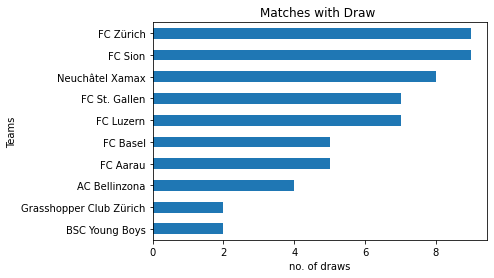

In [1133]:
draws_swis_0910.plot(kind="barh", title="Matches with Draw ");
plt.xlabel("no. of draws");
plt.ylabel("Teams");

**FC Zürich** **FC Sion** both have the heighest no. of matches with draw. (with **9 DRAWs**) 

**Neuchâtel Xamax** has the second fewest no. of matches with draw. (with **8 DRAWs**)

on the other side **BSC Young Boys** & **Grasshopper Club Zürich** have both the least no. of matches with draw. (with **2 DRAWs**)


In [1134]:
h_draws_swis_0910= match_swis_0910.groupby(["h_team"]).apply(lambda x: (x["winner"] == 'DRAW').sum()).sort_values(ascending=False)
h_draws_swis_0910

#h_losers_swis_0910: no. of matches ended with draw for each team in Switzerland Super League as a home team season 2009-2010

h_team
FC Sion                    5
FC St. Gallen              5
FC Zürich                  4
Neuchâtel Xamax            4
AC Bellinzona              3
BSC Young Boys             2
FC Aarau                   2
FC Basel                   2
FC Luzern                  1
Grasshopper Club Zürich    1
dtype: int64

In [1135]:
a_draws_swis_0910=match_swis_0910.groupby(["a_team"]).apply(lambda x: (x["winner"] == 'DRAW').sum()).sort_values(ascending=False)
a_draws_swis_0910

#a_losers_swis_0910: no. of matches ended with draw for each team in Switzerland Super League as an away team season 2009-2010

a_team
FC Luzern                  6
FC Zürich                  5
FC Sion                    4
Neuchâtel Xamax            4
FC Aarau                   3
FC Basel                   3
FC St. Gallen              2
AC Bellinzona              1
Grasshopper Club Zürich    1
BSC Young Boys             0
dtype: int64

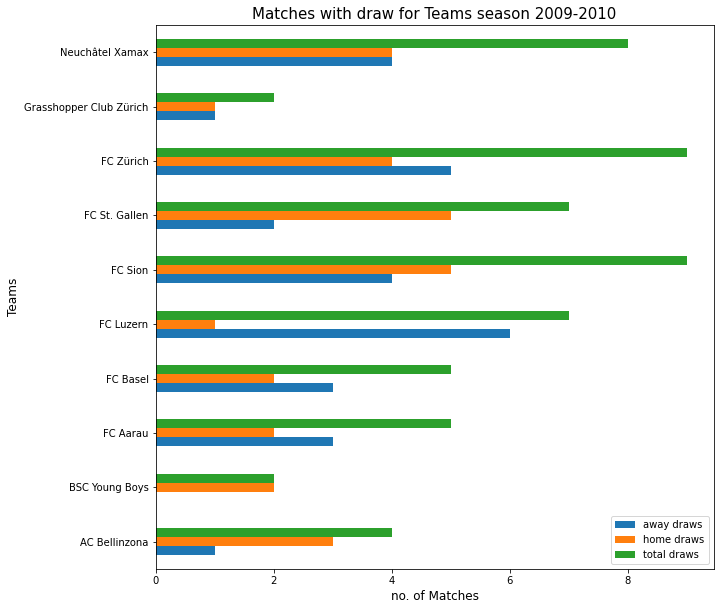

In [1136]:
df = pd.DataFrame({'away draws': a_draws_swis_0910,
                   'home draws': h_draws_swis_0910, "total draws":draws_swis_0910})
ax = df.plot.barh(figsize=(10,10), fontsize=10)
plt.xlabel("no. of Matches", fontsize=12);
plt.ylabel("Teams", fontsize=12);
plt.title("Matches with draw for Teams season 2009-2010", fontsize=15);

Here we can notice the Draws of each team, and we can also see the portions of the **home Draws** and the **away Draws**.

**6.4. Which team has the best striking line?** 

##### (according to the no. of scored goals)

In [1137]:
scored_swis_0910= match_swis_0910.groupby('h_team')['home_team_goal'].sum().sort_values(ascending = False) +match_0910[match_0910["league_name"]=="Switzerland Super League"].groupby('a_team')['away_team_goal'].sum().sort_values(ascending = False)
scored_swis_0910.sort_values(ascending = False, inplace =True)
scored_swis_0910

#scored_swis_0910: no. of scored goals by each team in Switzerland Super League season 2009-2010

FC Basel                   90
BSC Young Boys             78
FC Luzern                  66
Grasshopper Club Zürich    65
FC Sion                    63
FC Zürich                  55
Neuchâtel Xamax            55
FC St. Gallen              53
AC Bellinzona              42
FC Aarau                   32
dtype: int64

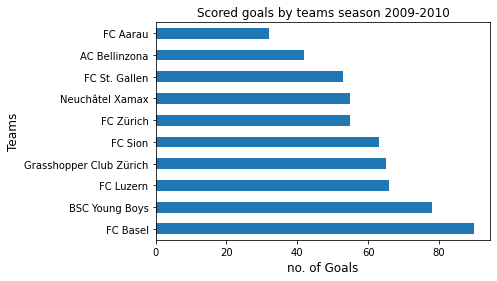

In [1138]:
scored_swis_0910.plot(kind="barh", title="Scored goals by teams season 2009-2010")
plt.xlabel("no. of Goals", fontsize=12);
plt.ylabel("Teams", fontsize=12);

**FC Basel** has really remarkable strikers to be the most scoring team with **90 Goals**.

**BSC Young Boys** comes second by scoring **78 Goal**.

**FC Aarau** scored the least no. of goals by scoring only **32 Goals**.

In [1139]:
h_scored_swis_0910 = match_swis_0910.groupby('h_team')['home_team_goal'].sum().sort_values(ascending = False) 
h_scored_swis_0910

h_team
FC Basel                   54
FC Luzern                  46
FC Sion                    44
Grasshopper Club Zürich    42
BSC Young Boys             41
Neuchâtel Xamax            35
FC Zürich                  31
AC Bellinzona              24
FC St. Gallen              24
FC Aarau                   18
Name: home_team_goal, dtype: int64

In [1140]:
a_scored_swis_0910= match_swis_0910.groupby('a_team')['away_team_goal'].sum().sort_values(ascending = False) 
a_scored_swis_0910

a_team
BSC Young Boys             37
FC Basel                   36
FC St. Gallen              29
FC Zürich                  24
Grasshopper Club Zürich    23
FC Luzern                  20
Neuchâtel Xamax            20
FC Sion                    19
AC Bellinzona              18
FC Aarau                   14
Name: away_team_goal, dtype: int64

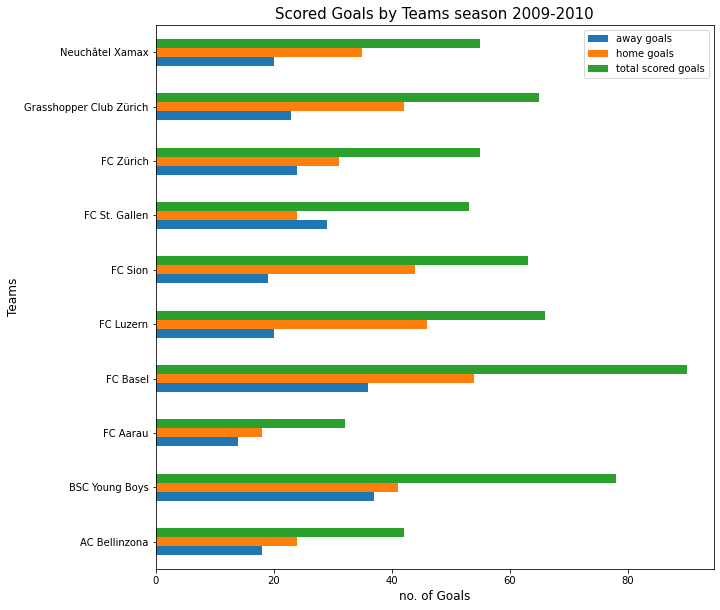

In [1141]:
df = pd.DataFrame({'away goals': a_scored_swis_0910,
                   'home goals': h_scored_swis_0910, "total scored goals":scored_swis_0910})
ax = df.plot.barh(figsize=(10,10), fontsize=10)
plt.xlabel("no. of Goals", fontsize=12);
plt.ylabel("Teams", fontsize=12);
plt.title("Scored Goals by Teams season 2009-2010", fontsize=15);

Here we can notice the portions of goals scored as a home team and as an away team out of the whole scored goals.

**6.5. Which team has the best Defending line?** 

##### (according to the no. of received goals)

In [1142]:
received_swis_0910=match_swis_0910.groupby('a_team')['home_team_goal'].sum().sort_values(ascending = False) + match_swis_0910.groupby('h_team')['away_team_goal'].sum().sort_values(ascending = False)
received_swis_0910.sort_values(ascending = False, inplace =True)
received_swis_0910

#received_swis_0910: no. of received goals by each team in Switzerland Super League season 2009-2010

AC Bellinzona              92
FC Aarau                   88
FC Zürich                  58
FC Sion                    57
Neuchâtel Xamax            57
FC St. Gallen              56
FC Luzern                  55
BSC Young Boys             47
FC Basel                   46
Grasshopper Club Zürich    43
dtype: int64

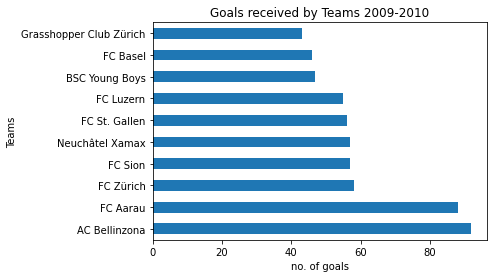

In [1143]:
received_swis_0910.plot(kind="barh")
plt.xlabel("no. of goals")
plt.ylabel("Teams")
plt.title("Goals received by Teams 2009-2010");

**Grasshopper Club Zürich** was the team with the least no. of received goals (**43 goals**)

**FC Basel** comes second as it received only (**46 Goals**)

while **AC Bellinzona** received the heighest no. of goals, as it received (**92 Goals**)

In [1144]:
h_received_swis_0910= match_swis_0910.groupby('h_team')['away_team_goal'].sum().sort_values(ascending = False)
h_received_swis_0910

#h_received_swis_0910: no. of goals received by teams in Switzerland Super League as a home team season 2009-2010

h_team
FC Aarau                   41
AC Bellinzona              40
Neuchâtel Xamax            27
FC Luzern                  23
FC St. Gallen              23
FC Sion                    22
FC Zürich                  20
FC Basel                   18
BSC Young Boys             13
Grasshopper Club Zürich    13
Name: away_team_goal, dtype: int64

In [1145]:
a_received_swis_0910= match_swis_0910.groupby('a_team')['home_team_goal'].sum().sort_values(ascending = False)
a_received_swis_0910

#a_received_swis_0910: no. of goals received by teams in Switzerland Super League as an away team season 2009-2010

a_team
AC Bellinzona              52
FC Aarau                   47
FC Zürich                  38
FC Sion                    35
BSC Young Boys             34
FC St. Gallen              33
FC Luzern                  32
Grasshopper Club Zürich    30
Neuchâtel Xamax            30
FC Basel                   28
Name: home_team_goal, dtype: int64

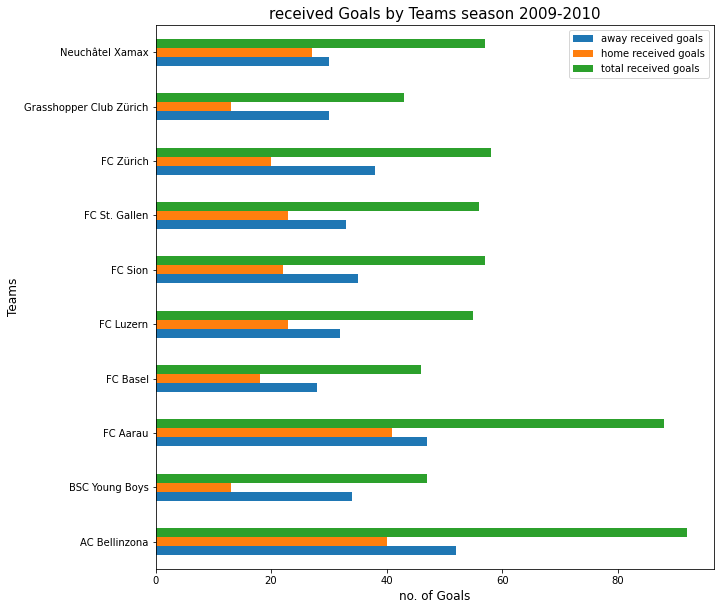

In [1146]:
df = pd.DataFrame({'away received goals': a_received_swis_0910,
                   'home received goals': h_received_swis_0910, "total received goals":received_swis_0910})
ax = df.plot.barh(figsize=(10,10), fontsize=10)
plt.xlabel("no. of Goals", fontsize=12);
plt.ylabel("Teams", fontsize=12);
plt.title("received Goals by Teams season 2009-2010", fontsize=15);

Here we can notice the distribution of the received goals, which were on the home and which were away.

finaly, let's ask:

#### 6.6. Who was the champion?

In [1147]:
points_swis_0910= (winners_swis_0910 *3 +draws_swis_0910)
points_swis_0910.sort_values(ascending= True, inplace=True)
points_swis_0910

#points_swis_0910: points gained by each team in season 2009-2010

FC Aarau                   23
AC Bellinzona              25
Neuchâtel Xamax            41
FC Zürich                  45
FC St. Gallen              46
FC Sion                    51
FC Luzern                  58
Grasshopper Club Zürich    65
BSC Young Boys             77
FC Basel                   80
dtype: int64

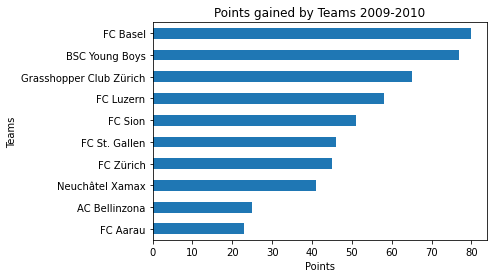

In [1148]:
points_swis_0910.plot(kind="barh")
plt.xlabel("Points")
plt.ylabel("Teams")
plt.title("Points gained by Teams 2009-2010");

**FC Basel** is the winner of **Switzerland Super League** in season**2009-2010** with **80 Points**

**BSC Young Boys** comes second with **77 Points**

###### let's look deeper on FC Basel , let's try to find:
### Q7: How FC Basel has been improved through the seasons?

In [1151]:
basel_win_1516=match_1516[match_1516["winner"]=="FC Basel"].date.count()
basel_win_1415=match_1415[match_1415["winner"]=="FC Basel"].date.count()
basel_win_1314=match_1314[match_1314["winner"]=="FC Basel"].date.count()
basel_win_1213=match_1213[match_1213["winner"]=="FC Basel"].date.count()
basel_win_1112=match_1112[match_1112["winner"]=="FC Basel"].date.count()
basel_win_1011=match_1011[match_1011["winner"]=="FC Basel"].date.count()
basel_win_0910=match_0910[match_0910["winner"]=="FC Basel"].date.count()
basel_win_0809=match_0809[match_0809["winner"]=="FC Basel"].date.count()

basel_win=[basel_win_0809, basel_win_0910, basel_win_1011, basel_win_1112, basel_win_1213, basel_win_1314, basel_win_1415, basel_win_1516]

#basel_win: no. of victories for FC Basel in each season.

In [1152]:
basel_los_1516=match_1516[match_1516["loser"]=="FC Basel"].date.count()
basel_los_1415=match_1415[match_1415["loser"]=="FC Basel"].date.count()
basel_los_1314=match_1314[match_1314["loser"]=="FC Basel"].date.count()
basel_los_1213=match_1213[match_1213["loser"]=="FC Basel"].date.count()
basel_los_1112=match_1112[match_1112["loser"]=="FC Basel"].date.count()
basel_los_1011=match_1011[match_1011["loser"]=="FC Basel"].date.count()
basel_los_0910=match_0910[match_0910["loser"]=="FC Basel"].date.count()
basel_los_0809=match_0809[match_0809["loser"]=="FC Basel"].date.count()

basel_los=[basel_los_0809, basel_los_0910, basel_los_1011, basel_los_1112, basel_los_1213, basel_los_1314, basel_los_1415,  basel_los_1516 ]

#basel_los: no. of defeats for FC Basel in each season.

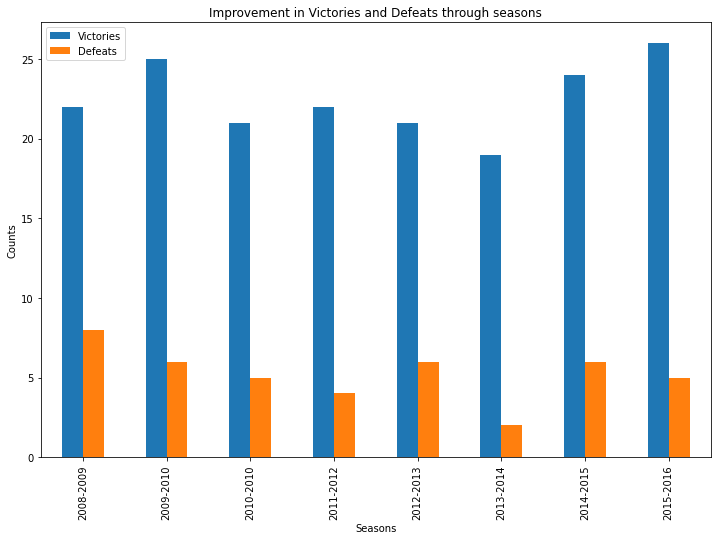

In [1154]:
df_line = pd.DataFrame({
   'Victories': basel_win,
   'Defeats': basel_los
   }, index=["2008-2009", "2009-2010", "2010-2010", "2011-2012", "2012-2013", "2013-2014", "2014-2015", "2015-2016"])
lines = df_line.plot.bar(figsize=(12,8),fontsize=10,  title="Improvement in Victories and Defeats through seasons", ylabel="Counts", xlabel="Seasons")

It's noticed that season *2009-2010* was remarkable one according to the victories which was, then there was a drop in the next season and then almost stable status with a range of *3 wins* for 4 seasons,

Starting from season 2014-2015 we notice an improvement in the number of victories as it achieved *26 wins* by 2015-2016.

according to the defeats, number of defeats was decreasing continuously from season 2008-2009 to season 2011-2012, but it has been increased to *6 defeats* in 2012-2013,
in 2014-2015 basel get defeated *6* times, and *5* times in 2015-2016, Basel finished season 2013-2014 with only two defeats.

#### let's see the improvement according to Goals:

In [1155]:
basel_scr_1516= match_1516[match_1516['a_team']=='FC Basel'].away_team_goal.sum()+match_1516[match_1516['h_team']=='FC Basel'].home_team_goal.sum()
basel_scr_1415= match_1415[match_1415['a_team']=='FC Basel'].away_team_goal.sum()+match_1415[match_1415['h_team']=='FC Basel'].home_team_goal.sum()
basel_scr_1314= match_1314[match_1314['a_team']=='FC Basel'].away_team_goal.sum()+match_1314[match_1314['h_team']=='FC Basel'].home_team_goal.sum()
basel_scr_1213= match_1213[match_1213['a_team']=='FC Basel'].away_team_goal.sum()+match_1213[match_1213['h_team']=='FC Basel'].home_team_goal.sum()
basel_scr_1112= match_1112[match_1112['a_team']=='FC Basel'].away_team_goal.sum()+match_1112[match_1112['h_team']=='FC Basel'].home_team_goal.sum()
basel_scr_1011= match_1011[match_1011['a_team']=='FC Basel'].away_team_goal.sum()+match_1011[match_1011['h_team']=='FC Basel'].home_team_goal.sum()
basel_scr_0910= match_0910[match_0910['a_team']=='FC Basel'].away_team_goal.sum()+match_0910[match_0910['h_team']=='FC Basel'].home_team_goal.sum()
basel_scr_0809= match_0809[match_0809['a_team']=='FC Basel'].away_team_goal.sum()+match_0809[match_0809['h_team']=='FC Basel'].home_team_goal.sum()

basel_scr= [basel_scr_0809, basel_scr_0910, basel_scr_1011, basel_scr_1112, basel_scr_1213, basel_scr_1314, basel_scr_1415, basel_scr_1516]


#basel_scr: goals scored by FC Basel in each season.

In [1156]:
basel_rec_1516= match_1516[match_1516['h_team']=='FC Basel'].away_team_goal.sum()+match_1516[match_1516['a_team']=='FC Basel'].home_team_goal.sum()
basel_rec_1415= match_1415[match_1415['h_team']=='FC Basel'].away_team_goal.sum()+match_1415[match_1415['a_team']=='FC Basel'].home_team_goal.sum()
basel_rec_1314= match_1314[match_1314['h_team']=='FC Basel'].away_team_goal.sum()+match_1314[match_1314['a_team']=='FC Basel'].home_team_goal.sum()
basel_rec_1213= match_1213[match_1213['h_team']=='FC Basel'].away_team_goal.sum()+match_1213[match_1213['a_team']=='FC Basel'].home_team_goal.sum()
basel_rec_1112= match_1112[match_1112['h_team']=='FC Basel'].away_team_goal.sum()+match_1112[match_1112['a_team']=='FC Basel'].home_team_goal.sum()
basel_rec_1011= match_1011[match_1011['h_team']=='FC Basel'].away_team_goal.sum()+match_1011[match_1011['a_team']=='FC Basel'].home_team_goal.sum()
basel_rec_0910= match_0910[match_0910['h_team']=='FC Basel'].away_team_goal.sum()+match_0910[match_0910['a_team']=='FC Basel'].home_team_goal.sum()
basel_rec_0809= match_0809[match_0809['h_team']=='FC Basel'].away_team_goal.sum()+match_0809[match_0809['a_team']=='FC Basel'].home_team_goal.sum()

basel_rec= [basel_rec_0809, basel_rec_0910, basel_rec_1011, basel_rec_1112, basel_rec_1213, basel_rec_1314, basel_rec_1415, basel_rec_1516]

#basel_rec: goals receiveded by FC Basel in each season.

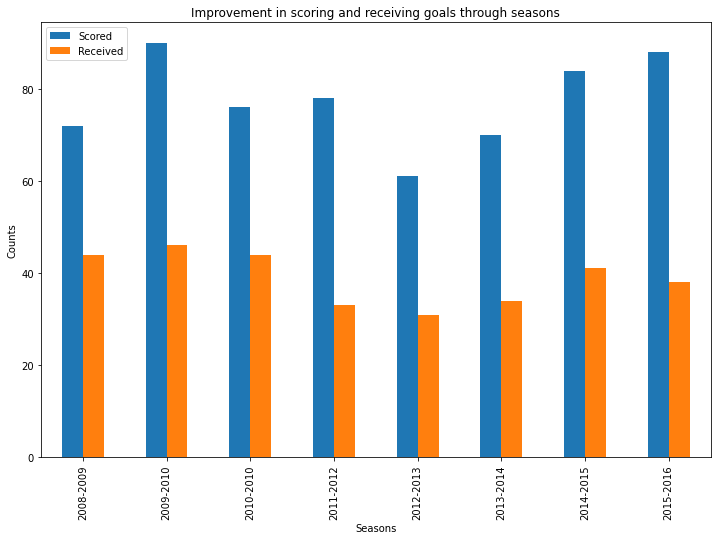

In [1157]:
df_line = pd.DataFrame({
   'Scored': basel_scr,
   'Received': basel_rec
   }, index=["2008-2009", "2009-2010", "2010-2010", "2011-2012", "2012-2013", "2013-2014", "2014-2015", "2015-2016"])
lines = df_line.plot.bar(figsize=(12,8),fontsize=10,  title="Improvement in scoring and receiving goals through seasons", ylabel="Counts", xlabel="Seasons")

FC Basel Scored the most in season 2009-2010 (90 goals), but the results wasn't better the next two seasons,
starting from 2013-2014 we notice a continuous improvement in scoring goals, as they scored *88* goals in 2015-2016.

on the other side, receiving goals hasn't exceeded *50* through the whole seasons, but it's noticed that seasons 2011-2012 , 2012-2013, 2014-2014 have the leaset received goals.

the received goals range was 15 goals along all the seasons.

it's noticed that the season of the most scored goals is also the season of the most received goals.
also the season of the most scored goals is the season of the second most victories.

### Q8:  Who is the BEST Player?


#### 8.1. Who is the best for Penalties?

In [1158]:
best_penalties=df_pattr.groupby("player_name")['penalties'].mean().sort_values( ascending=False).head(10)
best_penalties

player_name
Mario Balotelli               89.565217
Francesco Totti               89.550000
David Villa                   89.166667
Zlatan Ibrahimovic            88.000000
Timmy Simons                  87.607143
Adrian Mutu                   87.333333
Michael Ballack               87.200000
Frank Lampard                 87.083333
Ryan Giggs                    86.833333
Jan Vennegoor of Hesselink    86.750000
Name: penalties, dtype: float64

Here we found the top 10 for penalties, but

>**Mario Balotelli** is the BEST fo penalties.
>
>**Francesco Totti** is the second best for penalties.

#### 8.2. Who is the best with left foot for Penalties?

In [1159]:
best_penalties_left=df_pattr[df_pattr["preferred_foot"]=="left"].groupby("player_name")['penalties'].mean().sort_values( ascending=False).head(10)
best_penalties_left

player_name
Ryan Giggs            86.833333
Robin van Persie      86.605263
Julien Rodriguez      86.000000
Paulo Assuncao        85.500000
Eduardo               84.333333
Sejad Salihovic       83.760000
Ryad Boudebouz        83.388889
Mladen Petric         83.130435
Gaetano D'Agostino    82.954545
Francesco Lodi        82.848485
Name: penalties, dtype: float64

Here we found the top 10 for penalties with left foot, but

>**Ryan Giggs** is the BEST fo penalties with left foot.
>
>**Robin van Persie** is the second best for penalties with left foot.

#### 8.3. Who is the best Header?


In [1160]:
best_header=df_pattr.groupby("player_name")['heading_accuracy'].mean().sort_values( ascending=False).head(10)
best_header

player_name
Tim Cahill           93.111111
Michael Ballack      91.800000
Fernando Llorente    91.523810
John Terry           91.333333
Luca Toni            90.264706
Per Mertesacker      90.264706
Didier Drogba        90.235294
Daniel van Buyten    90.176471
Miroslav Klose       90.176471
Aritz Aduriz         89.720000
Name: heading_accuracy, dtype: float64

Here we found the top 10 best Headers, but

>**Tim Cahill** is the BEST Header.
>
>**Michael Ballack** is the second best Heaer.

#### 8.4. Who is the best Finisher?


In [1161]:
best_finisher=df_pattr.groupby("player_name")['finishing'].mean().sort_values( ascending=False).head(10)
best_finisher

player_name
Lionel Messi           92.230769
Cristiano Ronaldo      91.120000
Filippo Inzaghi        91.111111
Ruud van Nistelrooy    90.800000
Zlatan Ibrahimovic     90.000000
David Villa            88.833333
Robin van Persie       88.710526
Sergio Aguero          88.685714
Gonzalo Higuain        88.500000
Klaas Jan Huntelaar    88.071429
Name: finishing, dtype: float64

Here the best 10 for finishing, but:

>**lionel Messi** is the BEST Finisher.
>
>**Cristiano Ronaldoe** is the second best Finisher.

#### 8.5. Who is the best for Freekicks?


In [1162]:
best_freekicker=df_pattr.groupby("player_name")['free_kick_accuracy'].mean().sort_values( ascending=False).head(10)
best_freekicker

player_name
Andrea Pirlo               90.488889
David Beckham              90.071429
Juninho Pernambucano,20    89.315789
Sejad Salihovic            87.880000
Juan Arango                87.666667
Ronaldinho                 87.280000
Wesley Sneijder            87.218750
Xavi Hernandez             86.681818
Francesco Lodi             86.571429
Hakan Calhanoglu           86.393939
Name: free_kick_accuracy, dtype: float64

Here is the best 10 for Free-kicks, but:

>**Andrea Pirlo** is the best in Free-Kicks.
>
>**David Beckham** is the second best for Free-kicks.

#### 8.6. Who is the best for Freekicks with the left foot?


In [1163]:
best_freekicker_left=df_pattr[df_pattr["preferred_foot"]=="left"].groupby("player_name")['free_kick_accuracy'].mean().sort_values( ascending=False).head(10)
best_freekicker_left

player_name
Sejad Salihovic     87.880000
Juan Arango         87.666667
Francesco Lodi      87.272727
Julien Rodriguez    86.000000
Keisuke Honda       84.684211
Duda                84.678571
Christian Pander    84.571429
Gareth Bale         84.451613
Balazs Dzsudzsak    84.166667
Lionel Messi        84.115385
Name: free_kick_accuracy, dtype: float64

Here we found the top 10 for Free-Kicks with left foot, but

>**Sejad Salihovic** is the BEST fo Free-Kicks with left foot.
>
>**Juan Arango** is the second best for Free-Kicks with left foot.

#### 8.7. Who is the best for sprint speed?


In [1164]:
fastest=df_pattr.groupby("player_name")['sprint_speed'].mean().sort_values( ascending=False).head(10)
fastest

player_name
Theo Walcott                 95.696970
David Odonkor                94.375000
Victor Ibarbo                94.261905
Cristiano Ronaldo            93.760000
Ryo Miyaichi                 93.680000
Mathis Bolly                 93.500000
Pierre-Emerick Aubameyang    93.441860
Jhon Murillo                 93.000000
Jonathan Biabiany            92.517241
Obafemi Martins              92.170213
Name: sprint_speed, dtype: float64

Here we found the Fastest 10, but

>**Theo Walcotts** is the Fastest Player in Sprints.
>
>**David Odonkor** is the second Fastest player in sprints.

#### 8.8. Who is the best for Acceleration?


In [1165]:
fastest_acc=df_pattr.groupby("player_name")['acceleration'].mean().sort_values( ascending=False).head(10)
fastest_acc

player_name
Theo Walcott            95.787879
Lionel Messi            95.307692
Mathis Bolly            94.647059
Jody Lukoki             94.000000
Leon Bailey             93.714286
Obafemi Martins         93.531915
Aaron Lennon            93.423077
Christian Atsu          93.370370
Jarchinio Antonia       93.272727
Yevheniy Konoplyanka    93.000000
Name: acceleration, dtype: float64

Here we found the top 10 with Acceleration, but

>**Theo Walcott** has the highest Acceleration.
>
>**Lionel Messi** has the second highest Acceleration.

#### 8.9. Who has the heighest Potential?


In [1166]:
most_potential=df_pattr.groupby("player_name")['potential'].mean().sort_values( ascending=False).head(10)
most_potential

player_name
Lionel Messi          95.230769
Cristiano Ronaldo     93.480000
Neymar                90.760000
Andres Iniesta        90.560000
Mario Goetze          90.147059
Zlatan Ibrahimovic    90.047619
James Rodriguez       89.954545
Franck Ribery         89.916667
Manuel Neuer          89.655172
Sergio Ramos          89.421053
Name: potential, dtype: float64

Here we found the top 10 Players for the heighest poetential, but

>**Lionel Messi** has the highest Potential.
>
>**Cristiano Ronaldo** has the second highest Potential.

#### 8.10. Who is the best with Reactions?


In [1167]:
best_reaction=df_pattr.groupby("player_name")['reactions'].mean().sort_values( ascending=False).head(10)
best_reaction

player_name
Lionel Messi              92.538462
Xavi Hernandez            91.727273
Philipp Lahm              91.166667
Ruud van Nistelrooy       89.700000
Andres Iniesta            89.320000
Filippo Inzaghi           89.222222
Carlos Tevez              88.947368
Cristiano Ronaldo         88.160000
Bastian Schweinsteiger    86.961538
Andrea Pirlo              86.822222
Name: reactions, dtype: float64

Here we can see the top 10 for best Reaction

>**Lionel Messi** is the best with Reactions.
>
>**Xavi Hernandez** is the second best with Reactions.

#### 8.11. Who is the best Player under 21 yrs?

#### (according to "overall_rating")


In [1168]:
avg_rating_youth=df_pattr[df_pattr["birthday"]>'1995-01-01 00:00:00'].groupby("player_name")['overall_rating'].mean().sort_values( ascending=False).head(10)
avg_rating_youth

player_name
Angel Correa        75.291667
Jose Gimenez        74.928571
Anwar El-Ghazi      74.500000
Youri Tielemans     73.826087
Gaston Pereiro      73.714286
Balde Diao Keita    73.318182
Alen Halilovic      73.300000
Ruben Neves         73.000000
Ricardo Kishna      72.869565
Tonny Vilhena       71.900000
Name: overall_rating, dtype: float64

Here the best 10 players under 21.

>**Angel Correa** is the best player under 21.
>
>**jose Gimenez** comes second.


#### 8.12. Who is the best Goal keeper for the whole 8 seasons?
##### (according to gk_diving, gk_reflexes, gk_handling, gk_positioning, gk_kicking)

In [1169]:
best_gk = (df_pattr.groupby("player_name")['gk_diving'].mean().sort_values( ascending=False) + df_pattr.groupby("player_name")['gk_handling'].mean().sort_values( ascending=False) + df_pattr.groupby("player_name")['gk_positioning'].mean().sort_values( ascending=False) + df_pattr.groupby("player_name")['gk_kicking'].mean().sort_values( ascending=False) + df_pattr.groupby("player_name")['gk_reflexes'].mean().sort_values( ascending=False))/5
best_gk=best_gk.sort_values( ascending=False).head(10)
best_gk

player_name
Edwin van der Sar    85.250000
Manuel Neuer         84.682759
Petr Cech            83.445455
Iker Casillas        83.336364
Victor Valdes        82.990909
Pepe Reina           82.973333
Gianluigi Buffon     82.316129
Hugo Lloris          81.925000
Steve Mandanda       81.188889
Gregory Coupet       80.900000
dtype: float64

Here we can see the top 10 goal keepers,

> number 1 is **Edwin Van der Sar**
>
> number 2 is **Manuel Neuer**

#### 8.13. Who is the BEST Player for the whole 8 seasons? 
##### (according to "overall_rating")


In [1170]:
all_rating=df_pattr.groupby("player_name")['overall_rating'].mean().sort_values( ascending=False).head(10)
all_rating


player_name
Lionel Messi          92.192308
Cristiano Ronaldo     91.280000
Franck Ribery         88.458333
Andres Iniesta        88.320000
Zlatan Ibrahimovic    88.285714
Arjen Robben          87.840000
Xavi Hernandez        87.636364
Wayne Rooney          87.222222
Iker Casillas         86.954545
Philipp Lahm          86.733333
Name: overall_rating, dtype: float64

Finally we have the best 10 player in the 8 seasons, and the best of the best:

>**Lionel Messi** is the BEST.
>
>**Cristiano Ronaldo** is the second best player.

### Q9: What attributes make you the best Player?

In [1171]:
attr= df_pattr.corr().overall_rating.sort_values(ascending=False).iloc[1:]
attr

reactions             0.771856
potential             0.765435
short_passing         0.458243
ball_control          0.443991
long_passing          0.434525
vision                0.431493
shot_power            0.428053
penalties             0.392715
long_shots            0.392668
positioning           0.368978
volleys               0.361739
curve                 0.357566
crossing              0.357320
dribbling             0.354191
free_kick_accuracy    0.349800
finishing             0.330079
stamina               0.325606
aggression            0.322782
strength              0.315684
heading_accuracy      0.313324
jumping               0.258978
sprint_speed          0.253048
interceptions         0.249094
acceleration          0.243998
agility               0.239963
standing_tackle       0.163986
balance               0.160211
marking               0.132185
sliding_tackle        0.128054
weight                0.063945
gk_kicking            0.028799
gk_diving             0.027675
gk_posit

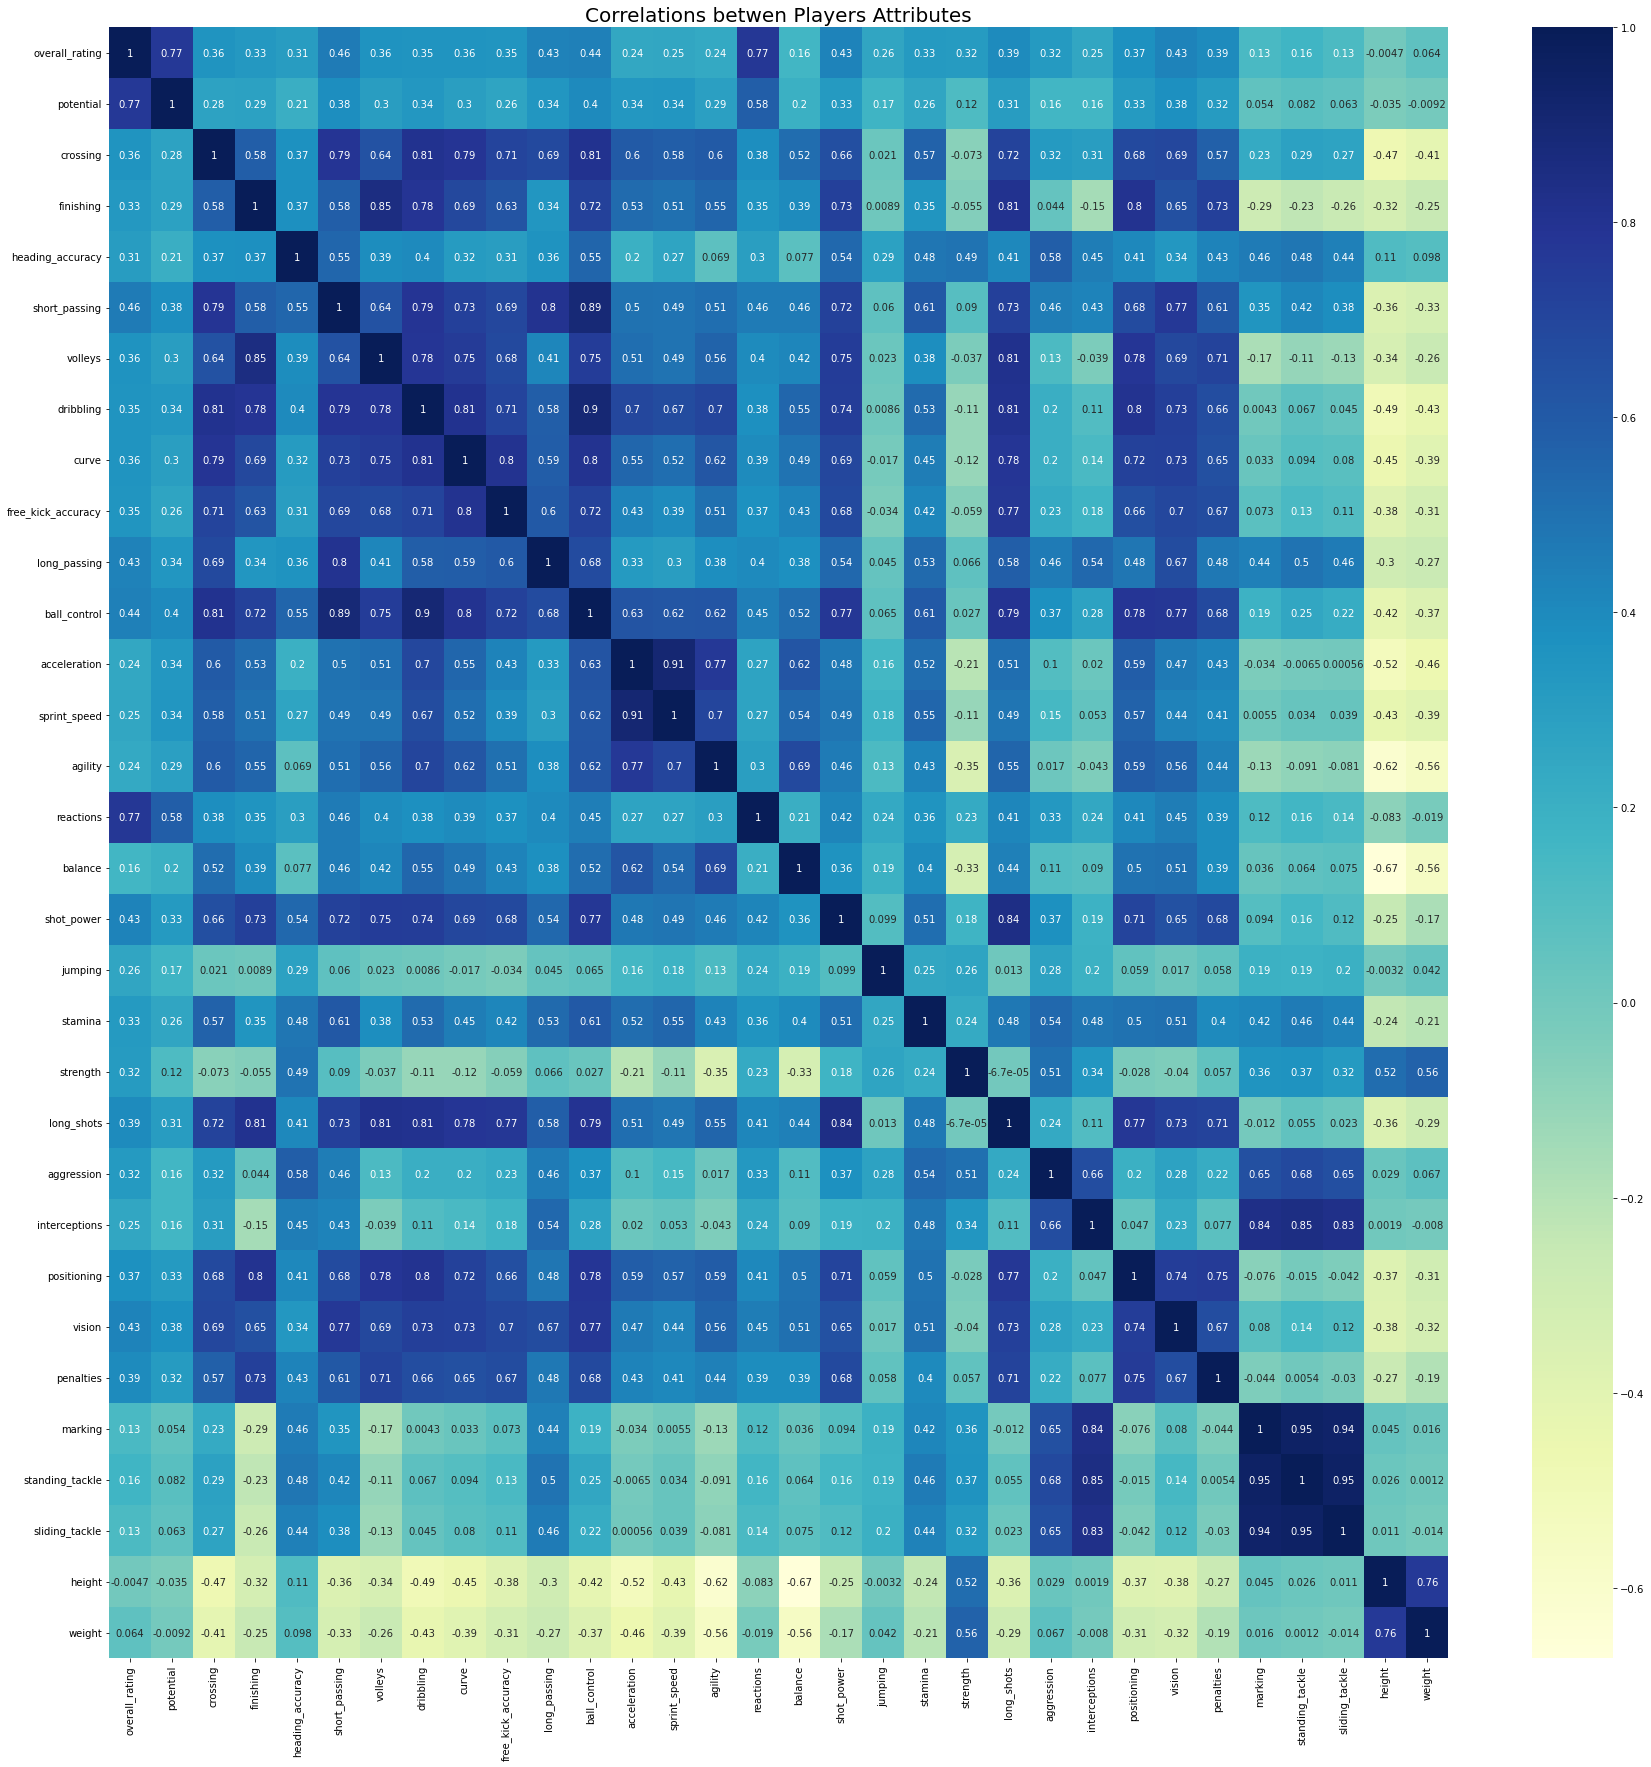

In [1172]:
df_pattr_corr=df_pattr[['overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
        'height', 'weight']]
fig, ax = plt.subplots(figsize=(30,30))
sb.heatmap(df_pattr_corr.corr(),cmap = 'YlGnBu',annot=True,ax=ax)
plt.title("Correlations betwen Players Attributes", fontsize=20)
plt.savefig('Heat-Map of contingency table of Attributes.png')

Here we present the correlations between attributes, so we can get the atrributes of strong correlation with the overall_rating,

And we use the heat map for better Visualization, as we can see Correlations between all the attributes.

In [978]:
attr.head(5)

reactions        0.771856
potential        0.765435
short_passing    0.458243
ball_control     0.443991
long_passing     0.434525
Name: overall_rating, dtype: float64

so to be the BEST you need mainly to improve these following five attributes:
    
>Firstly: **Reactions**
>
>Secondly: **Potential**
>
>Thirdly: **Short Passing**
>
>Fourthly: **Ball Control**
>
>Finally: **Long Passing**

<a id='conclusions'></a>
## Conclusions

    We can notice the distribution of matches in the different leagues, and also they are not the same portions every season. and we can see that Spain Liga BBVA, England Premier League, and France Ligue 1 are the most sustianable leagues across the seasons. 

    In order to find the most exciting league we calculated the Victory rate and the scoring rate,
>we find that **Spain LIGA BBVA** has the highest victory rate **76.8%**, 

>while  **Netherlands Eredivisie** has the highest scoring rate **3 goals/match**

    We did the same to find the most exciting Season
>we find that  **Season 2013-2014** comes first for the victories rate **(with 75.7%)**, 

>while **Season 2012-2013** has the highest scoring rate. **(with 2.77 goal/match)**

    But We wanted to know which league in which Season were the most exciting according to victories and Goals scoring
>we Find That **Switzerland Super League** has the highest rate of victories in season **2009-2010**  with 83.9% 

>according to Scoring rate also **Switzerland Super League** has the heighest rate in season **2009-2010**  with 3.33 goals/match.

    So we wanted to know more about that, 
        firstly we asked about the attributes of the top teams there to find what attributes affected to make that remarkable season, 
>we found that **ChanceCreationCrossing** is a common Attribute for more victories, 

>Aslo you need good **ChanceCreationShooting** attribute for more victories. 

>it's also noticed that **BuildUpPlaySeed** attribute wasn't exceeding (50) for all of the top teams.


    We needed to look Deeper on  **Switzerland Super League** in Season **2009-2010**

>we found that **BSC Young Boys** and **FC Basel** are the teams with the most victories **(25 victories)**

>**FC Basel** has the fewest no. of defeats (with **6 defeats**) 

>**FC Zürich** and **FC Sion** both have the highest no. of matches with draw. (with **9 DRAWs**)

>**FC Basel** has really remarkable strikers to be the most scoring team with **90 Goals**.

>**Grasshopper Club Zürich** was the team with the least no. of received goals (**43 goals**), while **FC Basel** comes second as it received only (**46 Goals**)

>**FC Basel** is the winner of **Switzerland Super League** in season**2009-2010** with **80 Points**

    So We wanted to know more about FC Basel and how it has been improved through seasons

>FC Basel Scored the most in season 2009-2010 (90 goals), but the results wasn't better the next two seasons,
starting from 2013-2014 we notice a continuous improvement in scoring goals, as they scored *88* goals in 2015-2016.

>on the other side, receiving goals hasn't exceeded *50* through the whole seasons, but it's noticed that seasons 2011-2012 , 2012-2013, 2014-2014 have the leaset received goals.

>the received goals range was 15 goals along all the seasons.

>it's noticed that the season of the most scored goals is also the season of the most received goals.
also the season of the most scored goals is the season of the second most victories.

    We want to know who was the best player?
>**Mario Balotelli** is the BEST fo penalties.

>**Ryan Giggs** is the BEST fo penalties with left foot.

>**Tim Cahill** is the BEST Header.

>**lionel Messi** is the BEST Finisher.

>**Andrea Pirlo** is the best in Free-Kicks.

>**Sejad Salihovic** is the BEST fo Free-Kicks with left foot.

>**Theo Walcotts** is the Fastest Player in Sprints.

>**Theo Walcott** has the highest Acceleration.

>**Lionel Messi** has the highest Potential.

>**Lionel Messi** is the best with Reactions.

>**Angel Correa** is the best player under 21.

> number 1 is **Edwin Van der Sar** and number 2 is **Manuel Neuer** as the best Goal keepers

>**Lionel Messi** is the BEST Player according to the overall rating through the 8 seasons.


    so Finally we tried to find correlations between the players attributes and the overall rating, we found the most 5 correlated attributes to get the highest rating 

>Firstly: **Reactions**
>
>Secondly: **Potential**
>
>Thirdly: **Short Passing**
>
>Fourthly: **Ball Control**
>
>Finally: **Long Passing**




### Limitations:

>"BuildUpPlayDrippling" column in players_attributes table contains lots of missing data. in general there are lots of missing data.

>Connections between players and their teams wolud be useful for more analysis.

>Also connections between players and their countries would be useful for the analysis.

>more data about players stats. in the matches would improve the analysis.